# Project 1: SAT & ACT Analysis

## Problem Statement

## This project aims to identify cities with major shifts in the participation rates for ACT and SAT exam for years 2017 and 2018 across US states and suggest recommendations to improve SAT participation rate.

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)

- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports:
import numpy as np
import pandas as pd
import scipy as stats
import seaborn as sns
import matplotlib.pyplot as plt

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Code:
#Process sat_2017 csv file to sat_2017 variable; act_2017 csv file to act_2017
sat_2017 = pd.read_csv('../data/sat_2017.csv')
act_2017 = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
#Code:
sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below.

In [5]:
# Look at each data set and check using .count to check for the existence non-NA/null
#Check size and counts across each column for sat
sat_row, sat_col = sat_2017.shape
print(f"Number of rows {sat_row} and columns {sat_col}")
print("SAT information ")
print(sat_2017.info())

#Check size and counts across each column for act
act_row, act_col = act_2017.shape
print(f"Number of rows {act_row} and columns {act_col}")
print("ACT information")
print(act_2017.info())

Number of rows 51 and columns 5
SAT information 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB
None
Number of rows 52 and columns 7
ACT information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        

In [6]:
#  Get SAT dataframe descriptive statistics after converting the "participation" column
sat_2017.describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [7]:
#Drop the "National" state entry and get the ACT dataframe descriptive statistics after converting the "participation" column
act_2017_modified = act_2017[act_2017["State"] != "National"]
act_2017_modified.describe()

,English,Math,Reading,Science
count,51.000000,51.000000,51.000000,51.000000
mean,20.931373,21.182353,22.013725,21.041176
std,2.353677,1.981989,2.067271,3.182463
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.450000,19.900000
50%,20.700000,20.900000,21.800000,21.300000
75%,23.300000,23.100000,24.150000,22.750000
max,25.500000,25.300000,26.000000,24.900000


**Answer**:

Both ACT 2017 and SAT 2017 datasets have similar number of entries reporting on average state performance across all states of USA (except where there is an additional "National" entry in ACT 2017 dataset), each having no missing data across the columns as indicated under .dtypes method above. 

The SAT dataset which has a data size of **51 rows by 5 columns**, with the datatypes for its columns as follows:
 - *State* - **object** datatype
 - *Participation* - **object** datatype
 - *Evidence-Based Reading and Writing* - **int64** datatype
 - *Math* - **int64** datatype
 - *Total* - **int64** datatype

The descriptive statistic for SAT dataset are as follows:
 - *Evidence-Based Reading and Writing* - **mean: 569.12 standard deviation: 45.67 and interquartile-range: 79.5**
 - *Math* - **mean: 547.63 standard deviation: 84.91 and interquartile-range: 77**
 - *Total* - **mean: 1126.10 standard deviation: 92.49 and interquartile-range: 156.5**
 
The ACT dataset which has a data size of **52 rows by 7 columns**, with the datatypes for its columns as follows:
 - *State* - **object** datatype
 - *Participation* - **object** datatype
 - *English* - **float64** datatype
 - *Math* - **float64** datatype
 - *Reading* - **float64** datatype
 - *Science* - **float64** datatype
 - *Composite* - **object** datatype
 
The descriptive statistic for ACT dataset (after removing "National" entry) are as follows:
 - *English* - **mean: 20.93 standard deviation: 2.35 and interquartile-range: 4.3**
 - *Math* - **mean: 21.18 standard deviation: 1.98 and interquartile-range: 3.7**
 - *Reading* - **mean: 22.01 standard deviation: 2.07 and interquartile-range: 3.7**
 - *Science* - **mean: 21.04 standard deviation: 3.18 and interquartile-range: 2.85**

#### 4a. Does the data look complete? 

In [8]:
#Code:
print(act_2017.info())
print(sat_2017.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math              

**Answer:** The data is complete as there are no non-null values across the columns.

#### 4b. Are there any obvious issues with the observations?
**Answer:** 

There are some issues in the ACT and SAT dataset. 

For ACT dataset:
1) There is a **"National"** entry which is not a state and should be removed when doing analysis on the dataset. 

2) In the **"Wyoming"** state entry, there is a **"20.2x"** entry under the *composite* column which is likely to be a typo error during entry which resulted in *object* datatype for that column. 

3) The *participation* column contains data with string **%** added to the back, which we need to remove to make the data into numerical form for further analysis. 

4) There is a suspiciously low value of **2.3** in the *Science* column. 

For SAT dataset:
1) There is a value of **52** for *math* column for the state of **Maryland** as the minimum value for the column by SAT math score range definition should be 200.

2) The **"participation"** column contains data with % added to the back, which we need to remove to make the data into numerical form for further analysis.

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**
**Answer:** 

For ACT, it is only possible for any individual to attain a score of between minimum 1 to a maximum 36 for each subject (English,Math,Science and Reading). Since the composite score is the average of the four subjects, the only possible values it should take is minimum 1 and maximum 36.

For SAT, the minimum value and maximum value for Evidence-Based Reading and Writing and Math subjects each is 200 and 800 respectively. Since the total value is the sum of the two subjects, the total should only consist of values between 400 to 1600 (both inclusive).

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

# Get the minimum and maximum value for each test/subtest

In [9]:
#For ACT
act_min_2017_english, act_max_2017_english = act_2017["English"].min(),act_2017["English"].max()
print(f"ACT English min: {act_min_2017_english} and max: {act_max_2017_english}")

act_min_2017_math, act_max_2017_math = act_2017["Math"].min(),act_2017["Math"].max()
print(f"ACT Math min: {act_min_2017_math} and max: {act_max_2017_math}")

act_min_2017_reading, act_max_2017_reading = act_2017["Reading"].min(),act_2017["Reading"].max()
print(f"ACT Reading min: {act_min_2017_reading} and max values: {act_max_2017_reading}")

act_min_2017_science, act_max_2017_science = act_2017["Science"].min(),act_2017["Science"].max()
print(f"ACT Science min: {act_min_2017_science} and max: {act_max_2017_science}")
print()


#For SAT
sat_min_2017_ebrw, sat_max_2017_ebrw = sat_2017["Evidence-Based Reading and Writing"].min(),sat_2017["Evidence-Based Reading and Writing"].max()
print(f"SAT Evidence-Based Reading and Writing min: {sat_min_2017_ebrw} and max: {sat_max_2017_ebrw}")

sat_min_2017_math, sat_max_2017_math = sat_2017["Math"].min(), sat_2017["Math"].max()
print(f"SAT Math min: {sat_min_2017_math} and max: {sat_max_2017_math}")

ACT English min: 16.3 and max: 25.5
ACT Math min: 18.0 and max: 25.3
ACT Reading min: 18.1 and max values: 26.0
ACT Science min: 2.3 and max: 24.9

SAT Evidence-Based Reading and Writing min: 482 and max: 644
SAT Math min: 52 and max: 651


In [10]:
#Check the state name with ACT science having 2.3 as average score which look dubious
act_2017[act_2017["Science"] == 2.3]

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6


#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

### **Answer:**

#### Referencing from https://www.act.org/content/dam/act/unsecured/documents/cccr2017/ACT_2017-Average_Scores_by_State.pdf, we need to edit the ACT composite score for the Wyoming state from **20.2x** to **20.2**

#### Referencing from https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/, we need to modify the math SAT score for Maryland state from **52** to **524**

In [11]:
#Rectify error for ACT
act_2017.update(act_2017.loc[act_2017["State"] == "Wyoming",["Composite"]].astype(str).replace({"20.2x":"20.2"}))
act_2017.update(act_2017.loc[act_2017["State"] == "Maryland",["Science"]].astype(float).replace({2.3:23.2}))

#Rectify error for SAT
sat_2017.update(sat_2017.loc[sat_2017["State"] == "Maryland",["Math"]].astype(int).replace({52:524}))

#### 5. What are your data types? 
Display the data types of each feature. 

In [12]:
#code
print(sat_2017.dtypes)
print(act_2017.dtypes)

State                                  object
Participation                          object
Evidence-Based Reading and Writing      int64
Math                                  float64
Total                                   int64
dtype: object
State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

**Answer**: For ACT dataset, the *Participation* and *Composite* columns are of object datatype. Similarly, for the SAT dataset, the *Participation* column is of object datatype. This indicates that there maybe some odd values in the entries of the mentioned columns of the datasets.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [13]:
def convert_participation_rates(string):
    """
    This function replaces the "%" sign with a empty character.
    Takes in the following argument:
    @lst: string
    """
    formatted_pptn_rate = string.replace("%","")
    return formatted_pptn_rate

- Fix any individual values preventing other columns from being the appropriate type.

In [14]:
#code.
act_2017["Participation"] = act_2017["Participation"].map(convert_participation_rates)
sat_2017["Participation"] = sat_2017["Participation"].map(convert_participation_rates)

- Finish your data modifications by making sure the columns are now typed appropriately.

In [15]:
#Convert the act dataframe's composite column to float datatype and sat dataframe's math column to integer datatype
act_2017[["Participation"]] = act_2017["Participation"].astype(float)
act_2017[["Composite"]] = act_2017[["Composite"]].astype(float)

sat_2017[["Participation"]] = sat_2017[["Participation"]].astype(float)
sat_2017[["Math"]] = sat_2017[["Math"]].astype(float)
sat_2017[["Evidence-Based Reading and Writing"]] = sat_2017[["Evidence-Based Reading and Writing"]].astype(float)
sat_2017[["Total"]] = sat_2017[["Total"]].astype(float)

- Display the data types again to confirm they are correct.

In [16]:
#Code:
print(sat_2017.dtypes)
print(act_2017.dtypes)

State                                  object
Participation                         float64
Evidence-Based Reading and Writing    float64
Math                                  float64
Total                                 float64
dtype: object
State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [17]:
# Rename columns for SAT and ACT dataframes
sat_2017_dict_rename = {
    "State": "state",
    "Participation" : "sat17_pptn",
    "Evidence-Based Reading and Writing" : "sat17_ebrw",
    "Math" : "sat17_math",
    "Total" : "sat17_total" 
}

sat_2017.rename(columns = sat_2017_dict_rename,
                inplace = True)

act_2017_dict_rename = {
    "State": "state",
    "Participation" : "act17_pptn",
    "English" : "act17_english",
    "Math" : "act17_math",
    "Reading" : "act17_reading",
    "Science": "act17_science",
    "Composite" : "act17_composite" 
}

act_2017.rename(columns = act_2017_dict_rename, inplace = True)
print(sat_2017.columns)
print(act_2017.columns)

Index(['state', 'sat17_pptn', 'sat17_ebrw', 'sat17_math', 'sat17_total'], dtype='object')
Index(['state', 'act17_pptn', 'act17_english', 'act17_math', 'act17_reading',
       'act17_science', 'act17_composite'],
      dtype='object')


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

# Data dictionary for ACT 2017, ACT 2018, SAT 2017, 2018 data merged into single dataframe


|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|*object*|SAT/ACT|US States participating in SAT/ACT exam for 2017,2018| 
|**act17_pptn**|*float*|ACT|US State participation rate in ACT exam for 2017|
|**act17_english**|*float*|ACT|US State average ACT score for English subject for 2017|
|**act17_math**|*float*|ACT|US State average ACT score for Math subject for 2017|
|**act17_reading**|*float*|ACT|US State average ACT score for Reading subject for 2017|
|**act17_science**|*float*|ACT|US State average ACT score for Science subject for 2017|
|**act17_composite**|*float*|ACT|US State average ACT Composite score for 2017 (Composite = Average of English, Math, Reading and Science subjects' scores)|
|**act18_pptn**|*float*|ACT|US State participation rate in ACT exam for 2018|
|**act18_composite**|*float*|ACT|US State average ACT Composite score for 2018 (Composite = Average of English, Math, Reading and Science subjects' scores)|
|**act18_english**|*float*|ACT|US State average ACT score for English subject for 2018|
|**act18_math**|*float*|ACT|US State average ACT score for Math subject for 2018|
|**act18_reading**|*float*|ACT|US State average ACT score for Reading subject for 2018|
|**act18_science**|*float*|ACT|US State average ACT score for Science subject for 2018|
|**sat17_pptn**|*float*|SAT|US State Participation rate in SAT exam for 2017| 
|**sat17_ebrw**|*float*|SAT|US State average SAT score for Evidence-Based Reading and Writing subject for 2017| 
|**sat17_math**|*float*|SAT|US State average SAT score for Math subject for 2017| 
|**sat17_total**|*float*|SAT|US State average total SAT score for 2017 (Total = Evidence-Based Reading and Writing + Math subjects' scores)|
|**sat18_pptn**|*float*|SAT|US State Participation rate in SAT exam for 2018| 
|**sat18_ebrw**|*float*|SAT|US State average SAT score for Evidence-Based Reading and Writing subject for 2018| 
|**sat18_math**|*float*|SAT|US State average SAT score for Math subject for 2018| 
|**sat18_total**|*float*|SAT|US State average total SAT score for 2018 (Total = Evidence-Based Reading and Writing + Math subjects' scores)|

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [18]:
#There is a "National" entry in state column which is redundant
act_2017 = act_2017[act_2017["state"] != "National"]

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [19]:
#Merge ACT and SAT dataframe by their respective state columns. Since we want all data, we merge with outer join
act_sat_2017 = pd.merge(act_2017,sat_2017, left_on="state",right_on="state", how="outer")

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [20]:
#Save data to csv file to current working directory
act_sat_2017.to_csv("./combined_2017.csv")

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [21]:
sat_2018 = pd.read_csv('../data/sat_2018.csv')
act_2018 = pd.read_csv('../data/act_2018_updated.csv')

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

# First, work on SAT 2018 dataset

In [22]:
#Get the size of SAT 2018 data. Look at the first 5 data entries.
print(f"Shape of SAT 2018 dataset: {sat_2018.shape}")
sat_2018.head()

Shape of SAT 2018 dataset: (51, 5)


,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [23]:
#Check datatypes for the columns
sat_2018.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [24]:
# Convert the participation column to int by removing the % character from the string
sat_2018["Participation"] = sat_2018["Participation"].map(convert_participation_rates)

# Convert the numerical columns into float type
sat_2018[["Participation"]] = sat_2018[["Participation"]].astype(float)
sat_2018[["Math"]] = sat_2018[["Math"]].astype(float)
sat_2018[["Evidence-Based Reading and Writing"]] = sat_2018[["Evidence-Based Reading and Writing"]].astype(float)
sat_2018[["Total"]] = sat_2018[["Total"]].astype(float)

#Check datatypes for the columns
sat_2018.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing    float64
Math                                  float64
Total                                 float64
dtype: object

In [25]:
# Rename columns for SAT and ACT dataframes
sat_2018_dict_rename = {
    "State": "state",
    "Participation" : "sat18_pptn",
    "Evidence-Based Reading and Writing" : "sat18_ebrw",
    "Math" : "sat18_math",
    "Total" : "sat18_total" 
}

sat_2018.rename(columns = sat_2018_dict_rename,
                inplace = True)

In [26]:
# Concat the sat dataframes using full outer join based on sat_state columns which is the same column name for both dataframes 
sat_df = pd.merge(sat_2017,sat_2018, on = "state", how = "outer")
sat_df.set_index("state",inplace = True)
sat_df.head()

,sat17_pptn,sat17_ebrw,sat17_math,sat17_total,sat18_pptn,sat18_ebrw,sat18_math,sat18_total
state,,,,,,,,
Alabama,5.0,593.0,572.0,1165.0,6.0,595.0,571.0,1166.0
Alaska,38.0,547.0,533.0,1080.0,43.0,562.0,544.0,1106.0
Arizona,30.0,563.0,553.0,1116.0,29.0,577.0,572.0,1149.0
Arkansas,3.0,614.0,594.0,1208.0,5.0,592.0,576.0,1169.0
California,53.0,531.0,524.0,1055.0,60.0,540.0,536.0,1076.0


# Next, work on ACT 2018 dataset

In [27]:
act_2018.head()

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1


In [28]:
act_2018[["Percentage of Students Tested"]] = act_2018["Percentage of Students Tested"].astype(float)
act_2018[["Average Composite Score"]] = act_2018[["Average Composite Score"]].astype(float)

#Check datatypes of columns
print(f"Shape of ACT 2018 dataset: {act_2018.shape}")
act_2018.dtypes

Shape of ACT 2018 dataset: (51, 7)


State                             object
Percentage of Students Tested    float64
Average Composite Score          float64
Average English Score            float64
Average Math Score               float64
Average Reading Score            float64
Average Science Score            float64
dtype: object

In [29]:
# Rename the columns in 2018 ACT data to act_2017 renamed dataframe columns for consistency
act_2018_dict_rename = {
    "State": "state",
    "Percentage of Students Tested" : "act18_pptn",
    "Average English Score" : "act18_english",
    "Average Math Score" : "act18_math",
    "Average Reading Score" : "act18_reading",
    "Average Science Score": "act18_science",
    "Average Composite Score" : "act18_composite" 
}

act_2018.rename(columns = act_2018_dict_rename, inplace = True)

In [30]:
# Merge the 2 ACT dataframe by outerjoin referencing on state columns from both dataframes
act_df = pd.merge(act_2017,act_2018, on = "state", how = "outer")
#Set the act_state column as dataframe index
act_df.set_index("state",inplace = True)
act_df.head()

,act17_pptn,act17_english,act17_math,act17_reading,act17_science,act17_composite,act18_pptn,act18_composite,act18_english,act18_math,act18_reading,act18_science
state,,,,,,,,,,,,
Alabama,100.0,18.9,18.4,19.7,19.4,19.2,100.0,19.1,18.9,18.3,19.6,19.0
Alaska,65.0,18.7,19.8,20.4,19.9,19.8,33.0,20.8,19.8,20.6,21.6,20.7
Arizona,62.0,18.6,19.8,20.1,19.8,19.7,66.0,19.2,18.2,19.4,19.5,19.2
Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,100.0,19.4,19.1,18.9,19.7,19.4
California,31.0,22.5,22.7,23.1,22.2,22.8,27.0,22.7,22.5,22.5,23.0,22.1


# Combine all dataframes and save as final.csv

In [31]:
sat_act_df = pd.merge(act_df, sat_df, on = "state", how = "outer")
#Get the size of merged SAT and ACT dataframes.
print(f"Shape of merged dataset: {sat_act_df.shape}")

#Save data as final.csv file to current working directory
sat_act_df.to_csv("./final.csv")

Shape of merged dataset: (51, 20)


## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [32]:
# Summary of merged SAT and ACT dataframes.
sat_act_df.describe()

,act17_pptn,act17_english,act17_math,act17_reading,act17_science,act17_composite,act18_pptn,act18_composite,act18_english,act18_math,act18_reading,act18_science,sat17_pptn,sat17_ebrw,sat17_math,sat17_total,sat18_pptn,sat18_ebrw,sat18_math,sat18_total
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,65.254902,20.931373,21.182353,22.013725,21.450980,21.519608,61.647059,21.486275,20.988235,21.125490,22.015686,21.345098,39.803922,569.117647,556.882353,1126.098039,45.745098,563.686275,556.235294,1120.019608
std,32.140842,2.353677,1.981989,2.067271,1.739353,2.020695,34.080976,2.106278,2.446356,2.035765,2.167245,1.870114,35.276632,45.666901,47.121395,92.494812,37.314256,47.502627,47.772623,94.155083
min,8.000000,16.300000,18.000000,18.100000,18.200000,17.800000,7.000000,17.700000,16.600000,17.800000,18.000000,17.900000,2.000000,482.000000,468.000000,950.000000,2.000000,480.000000,480.000000,977.000000
25%,31.000000,19.000000,19.400000,20.450000,19.950000,19.800000,28.500000,19.950000,19.100000,19.400000,20.450000,19.850000,4.000000,533.500000,523.500000,1055.500000,4.500000,534.500000,522.500000,1057.500000
50%,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000,66.000000,21.300000,20.200000,20.700000,21.600000,21.100000,38.000000,559.000000,548.000000,1107.000000,52.000000,552.000000,544.000000,1098.000000
75%,100.000000,23.300000,23.100000,24.150000,23.200000,23.600000,100.000000,23.550000,23.700000,23.150000,24.100000,23.050000,66.000000,613.000000,599.000000,1212.000000,77.500000,610.500000,593.500000,1204.000000
max,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000,100.000000,25.600000,26.000000,25.200000,26.100000,24.900000,100.000000,644.000000,651.000000,1295.000000,100.000000,643.000000,655.000000,1298.000000


In [33]:
sat_act_df.dtypes

act17_pptn         float64
act17_english      float64
act17_math         float64
act17_reading      float64
act17_science      float64
act17_composite    float64
act18_pptn         float64
act18_composite    float64
act18_english      float64
act18_math         float64
act18_reading      float64
act18_science      float64
sat17_pptn         float64
sat17_ebrw         float64
sat17_math         float64
sat17_total        float64
sat18_pptn         float64
sat18_ebrw         float64
sat18_math         float64
sat18_total        float64
dtype: object

#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [34]:
def std_function(lst):
    """
    This function takes in a list and returns the specified standard deviation function.
    Takes in the following argument:
    @lst: pandas series or list
    """
    
    summation  = 0
    mean = np.mean(lst) #Calculate the mean of the array
    for elem in lst:
        summation += (elem - mean)** 2
    sigma = (summation/len(lst)) ** 0.5
    return sigma

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [35]:
# Apply dictionary comprehension to apply the standard deviation function
sd = {
    col: std_function(sat_act_df[col]) for col in sat_act_df.columns if col != "state"
}
print(sd)

{'act17_pptn': 31.824175751231806, 'act17_english': 2.3304876369363363, 'act17_math': 1.9624620273436781, 'act17_reading': 2.0469029314842646, 'act17_science': 1.7222161451443676, 'act17_composite': 2.000786081581989, 'act18_pptn': 33.745194881997506, 'act18_composite': 2.0855261815801147, 'act18_english': 2.4222536143202795, 'act18_math': 2.015707255555717, 'act18_reading': 2.145891884510421, 'act18_science': 1.8516885484833543, 'sat17_pptn': 34.92907076664508, 'sat17_ebrw': 45.21697020437866, 'sat17_math': 46.65713364485503, 'sat17_total': 91.58351056778743, 'sat18_pptn': 36.946619223539415, 'sat18_ebrw': 47.03460978357609, 'sat18_math': 47.30194550378352, 'sat18_total': 93.22742384464433}


Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

**Answer:**

The manually calculated standard deviations do not match up with the output from pandas describe as the normalisation factor used by default is ${N-1}$ as per panda's documentation, compared to ${N}$ in the formula $\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$.

In the case for numpy's std method, it is the same calculation as the manual calculated standard deviation as per numpy's documentation.

# We can verify both by executing the following two code cells.

In [36]:
def std_function_pd_describe(lst):
    """
    This function takes in a list and returns the specified standard deviation function with normalisation
    factor N-1. This is to verify against the standard deviation formula used by panda's describe method.
    Takes in the following argument:
    @lst: pandas series or list
    """
    summation  = 0
    mean = np.mean(lst) #Calculate the mean of the array
    for elem in lst:
        summation += (elem - mean)** 2
    sigma = (summation/(len(lst)-1)) ** 0.5
    return sigma
sd_pd_std = {
    col: std_function_pd_describe(sat_act_df[col]) for col in sat_act_df.columns if col != "state"
}
print(sd_pd_std)

def std_function_numpy_std(lst):
    """
    This function takes in a list and returns the numpy standard deviation function with normalisation
    factor N. This is to verify the numpy standard deviation calculation against the manual standard deviation 
    calculation provided.
    Takes in the following argument:
    @lst: pandas series or list
    """
    std = np.std(lst) #Calculate the mean of the array
    return std

sd_np_std = {
    col: std_function_numpy_std(sat_act_df[col]) for col in sat_act_df.columns if col != "state"
}
print(sd_np_std)

{'act17_pptn': 32.14084201588683, 'act17_english': 2.35367713980303, 'act17_math': 1.9819894936505533, 'act17_reading': 2.0672706264873146, 'act17_science': 1.7393530462812443, 'act17_composite': 2.020694891154341, 'act18_pptn': 34.08097623567245, 'act18_composite': 2.1062781969951776, 'act18_english': 2.4463562339793055, 'act18_math': 2.035764538177723, 'act18_reading': 2.1672445684804105, 'act18_science': 1.8701137639716146, 'sat17_pptn': 35.276632270013046, 'sat17_ebrw': 45.66690138768932, 'sat17_math': 47.12139516560329, 'sat17_total': 92.49481172519046, 'sat18_pptn': 37.31425633039196, 'sat18_ebrw': 47.50262737831599, 'sat18_math': 47.77262322095955, 'sat18_total': 94.15508275097599}
{'act17_pptn': 31.824175751231806, 'act17_english': 2.3304876369363363, 'act17_math': 1.9624620273436781, 'act17_reading': 2.0469029314842646, 'act17_science': 1.7222161451443676, 'act17_composite': 2.000786081581989, 'act18_pptn': 33.745194881997506, 'act18_composite': 2.0855261815801147, 'act18_engl

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [37]:
sat_act_df.head()

,act17_pptn,act17_english,act17_math,act17_reading,act17_science,act17_composite,act18_pptn,act18_composite,act18_english,act18_math,act18_reading,act18_science,sat17_pptn,sat17_ebrw,sat17_math,sat17_total,sat18_pptn,sat18_ebrw,sat18_math,sat18_total
state,,,,,,,,,,,,,,,,,,,,
Alabama,100.0,18.9,18.4,19.7,19.4,19.2,100.0,19.1,18.9,18.3,19.6,19.0,5.0,593.0,572.0,1165.0,6.0,595.0,571.0,1166.0
Alaska,65.0,18.7,19.8,20.4,19.9,19.8,33.0,20.8,19.8,20.6,21.6,20.7,38.0,547.0,533.0,1080.0,43.0,562.0,544.0,1106.0
Arizona,62.0,18.6,19.8,20.1,19.8,19.7,66.0,19.2,18.2,19.4,19.5,19.2,30.0,563.0,553.0,1116.0,29.0,577.0,572.0,1149.0
Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,100.0,19.4,19.1,18.9,19.7,19.4,3.0,614.0,594.0,1208.0,5.0,592.0,576.0,1169.0
California,31.0,22.5,22.7,23.1,22.2,22.8,27.0,22.7,22.5,22.5,23.0,22.1,53.0,531.0,524.0,1055.0,60.0,540.0,536.0,1076.0


In [38]:
#Get the min and max values of the participation rates for ACT 2017, ACT 2018 , SAT 2017 and SAT 2018
#from the merged dataframe
min_act17_pptn, max_act17_pptn= sat_act_df["act17_pptn"].min(),sat_act_df["act17_pptn"].max()
min_act18_pptn, max_act18_pptn= sat_act_df["act18_pptn"].min(),sat_act_df["act18_pptn"].max()
min_sat17_pptn, max_sat17_pptn= sat_act_df["sat17_pptn"].min(),sat_act_df["sat17_pptn"].max()
min_sat18_pptn, max_sat18_pptn= sat_act_df["sat18_pptn"].min(),sat_act_df["sat18_pptn"].max()

print(f"Min participation rate for ACT 2017: {min_act17_pptn}, ACT 2018: {min_act18_pptn}\
, SAT 2017: {min_sat17_pptn}. SAT 2018: {min_sat18_pptn}")

print(f"Max participation rate for ACT 2017: {max_act17_pptn}, ACT 2018: {max_act18_pptn}\
, SAT 2017: {max_sat17_pptn}. SAT 2018: {max_sat18_pptn}")
#Get the min and max values of total composite for ACT 2017, ACT 2018 and also total scores for SAT 2017 and SAT 2018
#from the merged dataframe
min_act17_comp, max_act17_comp= sat_act_df["act17_composite"].min(),sat_act_df["act17_composite"].max()
min_act18_comp, max_act18_comp= sat_act_df["act18_composite"].min(),sat_act_df["act18_composite"].max()
min_sat17_total, max_sat17_total= sat_act_df["sat17_total"].min(),sat_act_df["sat17_total"].max()
min_sat18_total, max_sat18_total= sat_act_df["sat18_total"].min(),sat_act_df["sat18_total"].max()


print(f"Min total/composite score for ACT 2017: {min_act17_comp}, ACT 2018: {min_act18_comp} \
, SAT 2017: {min_sat17_total}. SAT 2018: {min_sat18_total}")

print(f"Max total/composite score for ACT 2017: {max_act17_comp}, ACT 2018: {max_act18_comp} \
, SAT 2017: {max_sat17_total}. SAT 2018: {max_sat18_total}")

#Use dictionary to store on the states having min/max participation rates for all 4 datasets

pptn_rate_dict = {
    "lowest_state_participation_2017_sat" :  sat_act_df[sat_act_df["sat17_pptn"] == min_sat17_pptn].index.values,
    "highest_state_participation_2017_sat" : sat_act_df[sat_act_df["sat17_pptn"] == max_sat17_pptn].index.values,
    "lowest_state_participation_2018_sat" : sat_act_df[sat_act_df["sat18_pptn"] == min_sat18_pptn].index.values,
    "highest_state_participation_2018_sat" : sat_act_df[sat_act_df["sat18_pptn"] == max_sat18_pptn].index.values,
    "lowest_state_participation_2017_act" : sat_act_df[sat_act_df["act17_pptn"] == min_act17_pptn].index.values,
    "highest_state_participation_2017_act" : sat_act_df[sat_act_df["act17_pptn"] == max_act17_pptn].index.values,
    "lowest_state_participation_2018_act" : sat_act_df[sat_act_df["act18_pptn"] == min_act18_pptn].index.values,
    "highest_state_participation_2018_act" : sat_act_df[sat_act_df["act18_pptn"] == max_act18_pptn].index.values
}

#Use dictionary to store on the states having lowest/highest total/composite score for all 4 datasets

total_score_dict = {
    "lowest_state_total_2017_sat" :  sat_act_df[sat_act_df["sat17_total"] == min_sat17_total].index.values,
    "highest_state_total_2017_sat" : sat_act_df[sat_act_df["sat17_total"] == max_sat17_total].index.values,
    "lowest_state_total_2018_sat" : sat_act_df[sat_act_df["sat18_total"] == min_sat18_total].index.values,
    "highest_state_total_2018_sat" : sat_act_df[sat_act_df["sat18_total"] == max_sat18_total].index.values,
    "lowest_state_composite_2017_act" : sat_act_df[sat_act_df["act17_composite"] == min_act17_comp].index.values,
    "highest_state_composite_2017_act" : sat_act_df[sat_act_df["act17_composite"] == max_act17_comp].index.values,
    "lowest_state_composite_2018_act" : sat_act_df[sat_act_df["act18_composite"] == min_act18_comp].index.values,
    "highest_state_composite_2018_act" : sat_act_df[sat_act_df["act18_composite"] == max_act18_comp].index.values
}

#Use pprint library to prettyprint the values of interest
import pprint
pprint.pprint(pptn_rate_dict)
print()
pprint.pprint(total_score_dict)

Min participation rate for ACT 2017: 8.0, ACT 2018: 7.0, SAT 2017: 2.0. SAT 2018: 2.0
Max participation rate for ACT 2017: 100.0, ACT 2018: 100.0, SAT 2017: 100.0. SAT 2018: 100.0
Min total/composite score for ACT 2017: 17.8, ACT 2018: 17.7 , SAT 2017: 950.0. SAT 2018: 977.0
Max total/composite score for ACT 2017: 25.5, ACT 2018: 25.6 , SAT 2017: 1295.0. SAT 2018: 1298.0
{'highest_state_participation_2017_act': array(['Alabama', 'Arkansas', 'Colorado', 'Kentucky', 'Louisiana',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nevada',
       'North Carolina', 'Oklahoma', 'South Carolina', 'Tennessee',
       'Utah', 'Wisconsin', 'Wyoming'], dtype=object),
 'highest_state_participation_2017_sat': array(['Connecticut', 'Delaware', 'District of Columbia', 'Michigan'],
      dtype=object),
 'highest_state_participation_2018_act': array(['Alabama', 'Arkansas', 'Kentucky', 'Louisiana', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'North Carolina',
       'Ohio'

In [39]:
# Calculate rate change year-to-year and store the value as new dataframe column
sat_act_df["sat_pptn_change"] = sat_act_df["sat18_pptn"] - sat_act_df["sat17_pptn"]
sat_act_df["act_pptn_change"] = sat_act_df["act18_pptn"] - sat_act_df["act17_pptn"]


# Filter the dataframe for states that has at least a 100% participation rate in one of the SAT test and 
# non-zero rate of change between the 2 SAT tests or at least a 100% participation rate in one of the ACT test and 
# non-zero rate of change between the 2 ACT tests

max_participation_df = sat_act_df[(((sat_act_df["sat17_pptn"] == 100) | \
                                   (sat_act_df["sat18_pptn"] == 100)) & \
                                   (sat_act_df["sat_pptn_change"] != 0)) | \
                                  (((sat_act_df["act17_pptn"] == 100) | \
                                   (sat_act_df["act18_pptn"] == 100)) & \
                                   (sat_act_df["act_pptn_change"] != 0))
                                 ].loc[:,["act17_pptn","act18_pptn","act_pptn_change","sat17_pptn","sat18_pptn","sat_pptn_change"]]

# Sort by percentage change in ascending order for SAT participation rate based on above criteria
max_participation_df.sort_values("sat_pptn_change")

,act17_pptn,act18_pptn,act_pptn_change,sat17_pptn,sat18_pptn,sat_pptn_change
state,,,,,,
District of Columbia,32.0,32.0,0.0,100.0,92.0,-8.0
Nebraska,84.0,100.0,16.0,3.0,3.0,0.0
Minnesota,100.0,99.0,-1.0,3.0,4.0,1.0
Ohio,75.0,100.0,25.0,12.0,18.0,6.0
Idaho,38.0,36.0,-2.0,93.0,100.0,7.0
Colorado,100.0,30.0,-70.0,11.0,100.0,89.0


In [40]:
# Sort by percentage change in ascending order for ACT participation rate based on above criteria
max_participation_df.sort_values("act_pptn_change")

,act17_pptn,act18_pptn,act_pptn_change,sat17_pptn,sat18_pptn,sat_pptn_change
state,,,,,,
Colorado,100.0,30.0,-70.0,11.0,100.0,89.0
Idaho,38.0,36.0,-2.0,93.0,100.0,7.0
Minnesota,100.0,99.0,-1.0,3.0,4.0,1.0
District of Columbia,32.0,32.0,0.0,100.0,92.0,-8.0
Nebraska,84.0,100.0,16.0,3.0,3.0,0.0
Ohio,75.0,100.0,25.0,12.0,18.0,6.0


In [41]:
# Get states with above 50% participation rate for both SAT and ACT for either year 2017 or 2018
above_50_pptn = sat_act_df[((sat_act_df["sat17_pptn"] > 50) & (sat_act_df["act17_pptn"] > 50)) | \
        ((sat_act_df["sat18_pptn"] > 50) & (sat_act_df["act18_pptn"] > 50))]

above_50_pptn

,act17_pptn,act17_english,act17_math,act17_reading,act17_science,act17_composite,act18_pptn,act18_composite,act18_english,act18_math,...,sat17_pptn,sat17_ebrw,sat17_math,sat17_total,sat18_pptn,sat18_ebrw,sat18_math,sat18_total,sat_pptn_change,act_pptn_change
state,,,,,,,,,,,,,,,,,,,,,
Florida,73.0,19.0,19.4,21.0,19.4,19.8,66.0,19.9,19.2,19.3,...,83.0,520.0,497.0,1017.0,56.0,550.0,549.0,1099.0,-27.0,-7.0
Georgia,55.0,21.0,20.9,22.0,21.3,21.4,53.0,21.4,20.9,20.7,...,61.0,535.0,515.0,1050.0,70.0,542.0,522.0,1064.0,9.0,-2.0
Hawaii,90.0,17.8,19.2,19.2,19.3,19.0,89.0,18.9,18.2,19.0,...,55.0,544.0,541.0,1085.0,56.0,480.0,530.0,1010.0,1.0,-1.0
North Carolina,100.0,17.8,19.3,19.6,19.3,19.1,100.0,19.1,18.0,19.3,...,49.0,546.0,535.0,1081.0,52.0,554.0,543.0,1098.0,3.0,0.0
South Carolina,100.0,17.5,18.6,19.1,18.9,18.7,100.0,18.3,17.3,18.2,...,50.0,543.0,521.0,1064.0,55.0,547.0,523.0,1070.0,5.0,0.0


In [42]:
# Retrieve the index(state) values
above_50_pptn.index.values

array(['Florida', 'Georgia', 'Hawaii', 'North Carolina', 'South Carolina'],
      dtype=object)

# Answer:

- State(s) having the **highest** participation rates for the:
    - 2017 SAT (Participation rate: 100%):
       - *Connecticut, Delaware, District of Columbia and Michigan*
    - 2018 SAT (Participation rate: 100%):
       - *Colorado, Connecticut, Delaware, Idaho and Michigan*
    - 2017 ACT (Participation rate: 100%):
       - *Alabama, Arkansas, Colorado, Kentucky, Louisiana, Minnesota, Mississippi, Missouri, Montana, Nevada, North Carolina, Oklahoma, South Carolina, Tennessee, Utah, Wisconsin and Wyoming*
    - 2018 ACT (Participation rate: 100%):
       - *Alabama, Arkansas, Kentucky, Louisiana, Mississippi, Missouri, Montana, Nebraska, Nevada, North Carolina, Ohio, Oklahoma, South Carolina, Tennessee, Utah, Wisconsin and Wyoming*
    
- State(s) having **lowest** participation rates for the following:
    - 2017 SAT (Participation rate: 2%):
       - *Iowa, Mississippi and North Dakota*
    - 2018 SAT (Participation rate: 2%):
       - *North Dakota*
    - 2017 ACT (Participation rate: 8%):
       - *Maine*
    - 2018 ACT (Participation rate: 7%):
       - *Maine*
       
- Which states have the **highest** mean total/composite scores for the:
    - 2017 SAT (Total 1295):
       - *Minnesota*
    - 2018 SAT (Total 1298):
       - *Minnesota*
    - 2017 ACT (Composite score: 25.5):
       - *New Hampshire*
    - 2018 ACT (Composite score: 25.6):
       - *Connecticut*
       
- Which states have the **lowest** mean total/composite scores for the:
    - 2017 SAT (Total: 950):
       - *District of Columnbia*
    - 2018 SAT (Total: 977):
       - *District of Columnbia*
    - 2017 ACT (Composite score: 17.8):
       - *Nevada*
    - 2018 ACT (Composite score: 17.7):
       - *Nevada*

- Do any states with 100% participation on a given test have a rate change year-to-year?
    - Yes. The states are *Colorado, District of Columnbia, Idaho, Minnesota, Nebraska and Ohio*
        - Further breakdown:
            - Colorado: 70% drop in ACT takers from 2017 to 2018, and 89% increase in SAT takers from 2017 to 2018
            - District of Columnbia: 8% drop in SAT takers from 2017 to 2018
            - Idaho: 7% increase in SAT takers from 2017 to 2018
            - Minnesota: 1% drop in ACT takers from 2017 to 2018
            - Nebraska: 16% increase in ACT takers from 2017 to 2018
            - Ohio: 25% increase in ACT takers from 2017 to 2018
- Do any states show have >50% participation on *both* tests either year?
    - Yes. The states are *Florida, Georgia, Hawaii, North Carolina and South Carolina*

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.
    - The state of Colorado and California. There was a shift in exam participation by the juniors in Colorado from ACT to SAT which makes it interesting. The state of California which is most populous state in US, did not achieve any highest composite/total scores nor participation rates for both tests. 

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

In [43]:
# Create a separate copy of dataframe to work on

sat_act_df_copy = sat_act_df.copy()
sat_act_df_copy.drop(["sat_pptn_change","act_pptn_change"],axis=1,inplace=True)

Text(0.5, 1.0, 'Heatmap showing the correlation of numeric columns in dataframe')

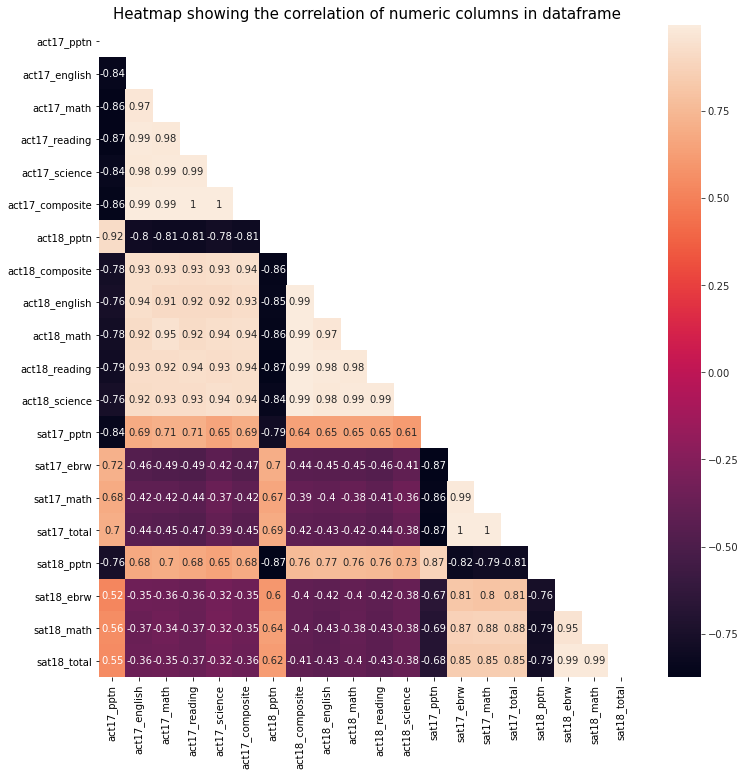

In [44]:
%matplotlib inline
plt.figure(figsize=(12,12))
ax = plt.axes()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(sat_act_df_copy.corr(), dtype=bool))
with sns.axes_style("white"):
    sns.heatmap(sat_act_df_copy.corr(), mask = mask, square = False, annot=True);
ax.set_title('Heatmap showing the correlation of numeric columns in dataframe',fontsize = 15)

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [45]:
import random
from matplotlib.ticker import FuncFormatter, MaxNLocator
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    """
    This function generates a n by 2 subplots of histogram for required columns of the dataframe.
    Takes in the following argument:
    @dataframe: pandas dataframe
    @list_of_columns: names of corresponding pandas dataframe columns
    @list_of_titles: list of title to be used for plotting histogram for specified dataframe column
    @list_of_xlabels: list of xlabels for use in labelling the x-axis of histogram plots
    """
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize = (18,12)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    
    #color list generated randomly for coloring different histogram plots
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) \
             for i in range(len(list_of_columns))]
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column],color = color[i]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[0],fontsize = 15)
        ax[i].set_ylabel("Frequency counts",fontsize = 15)
        #Set yaxis tickers to integer values
        ax[i].yaxis.set_major_locator(MaxNLocator(integer=True))
    #Prevents overlap of titles,axes
    plt.tight_layout()

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

### Histogram plots for participation rates for SAT and ACT

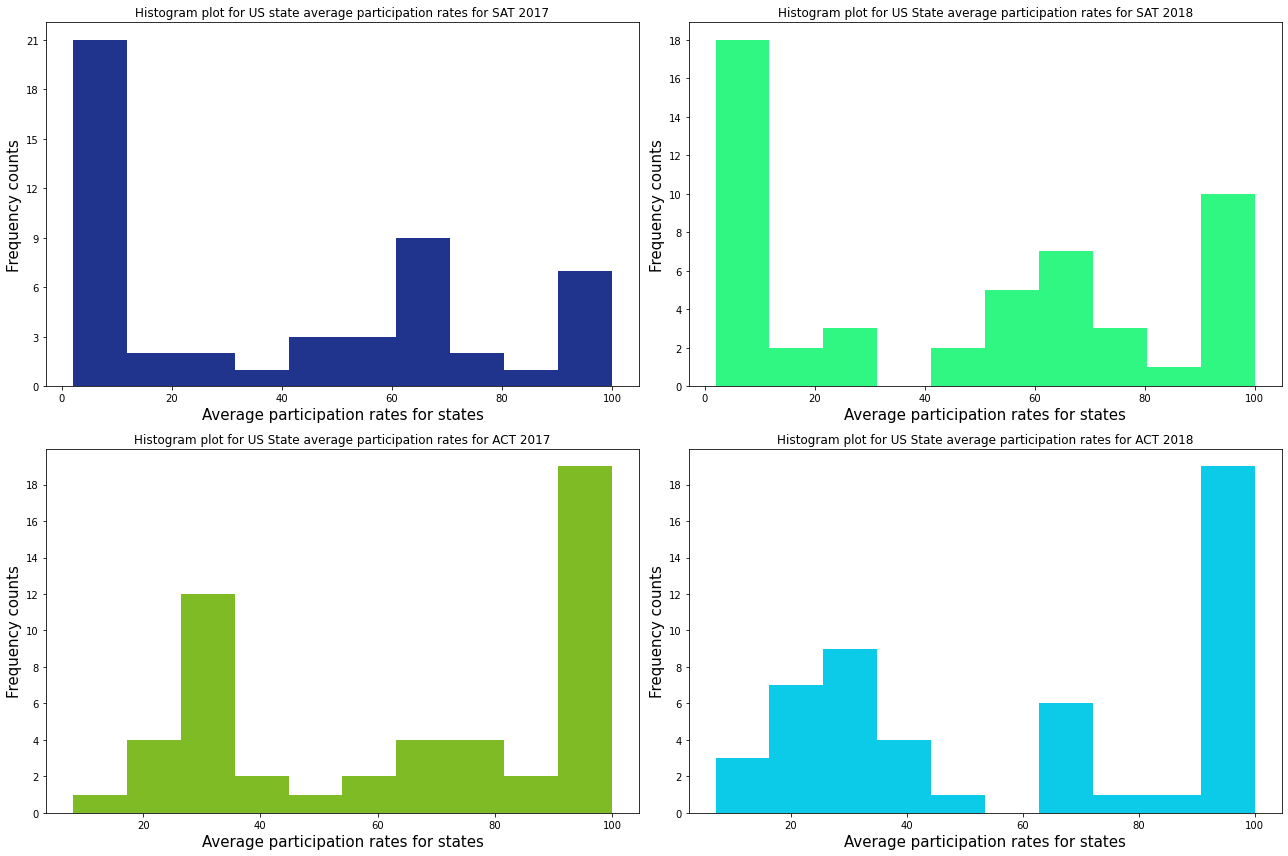

In [46]:
# Code
columns = ["sat17_pptn","sat18_pptn","act17_pptn","act18_pptn"]
titles = ["Histogram plot for US state average participation rates for SAT 2017",\
          "Histogram plot for US State average participation rates for SAT 2018",\
          "Histogram plot for US State average participation rates for ACT 2017",\
          "Histogram plot for US State average participation rates for ACT 2018"]
subplot_histograms(sat_act_df_copy,list_of_columns = columns,\
                   list_of_titles = titles,list_of_xlabels = ["Average participation rates for states"])

### Histogram plots for math scores for SAT and ACT

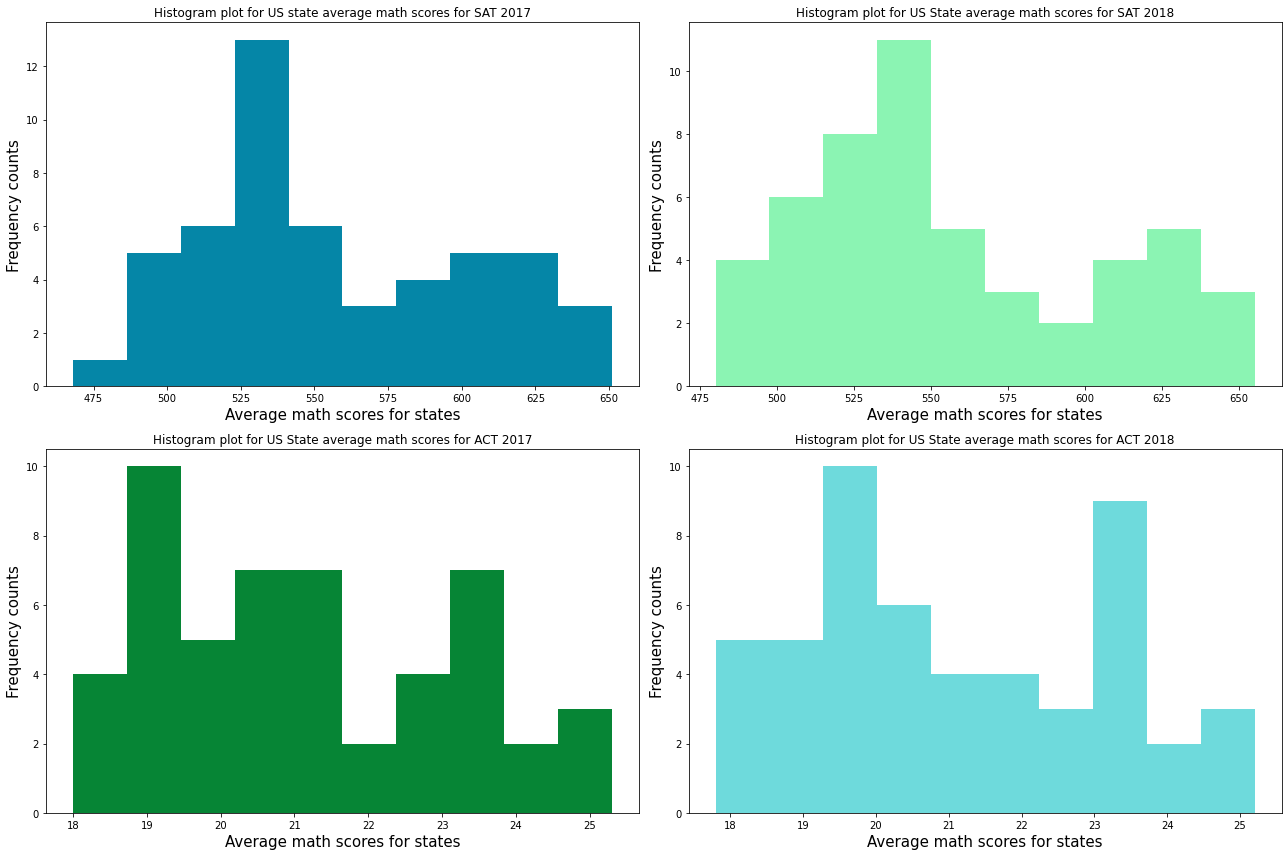

In [47]:
columns = ["sat17_math","sat18_math","act17_math","act18_math"]
titles = ["Histogram plot for US state average math scores for SAT 2017",\
          "Histogram plot for US State average math scores for SAT 2018",\
          "Histogram plot for US State average math scores for ACT 2017",\
          "Histogram plot for US State average math scores for ACT 2018"]
subplot_histograms(sat_act_df_copy,list_of_columns = columns,\
                   list_of_titles = titles,list_of_xlabels = ["Average math scores for states"])

### Histogram plots for reading/verbal scores for SAT & ACT

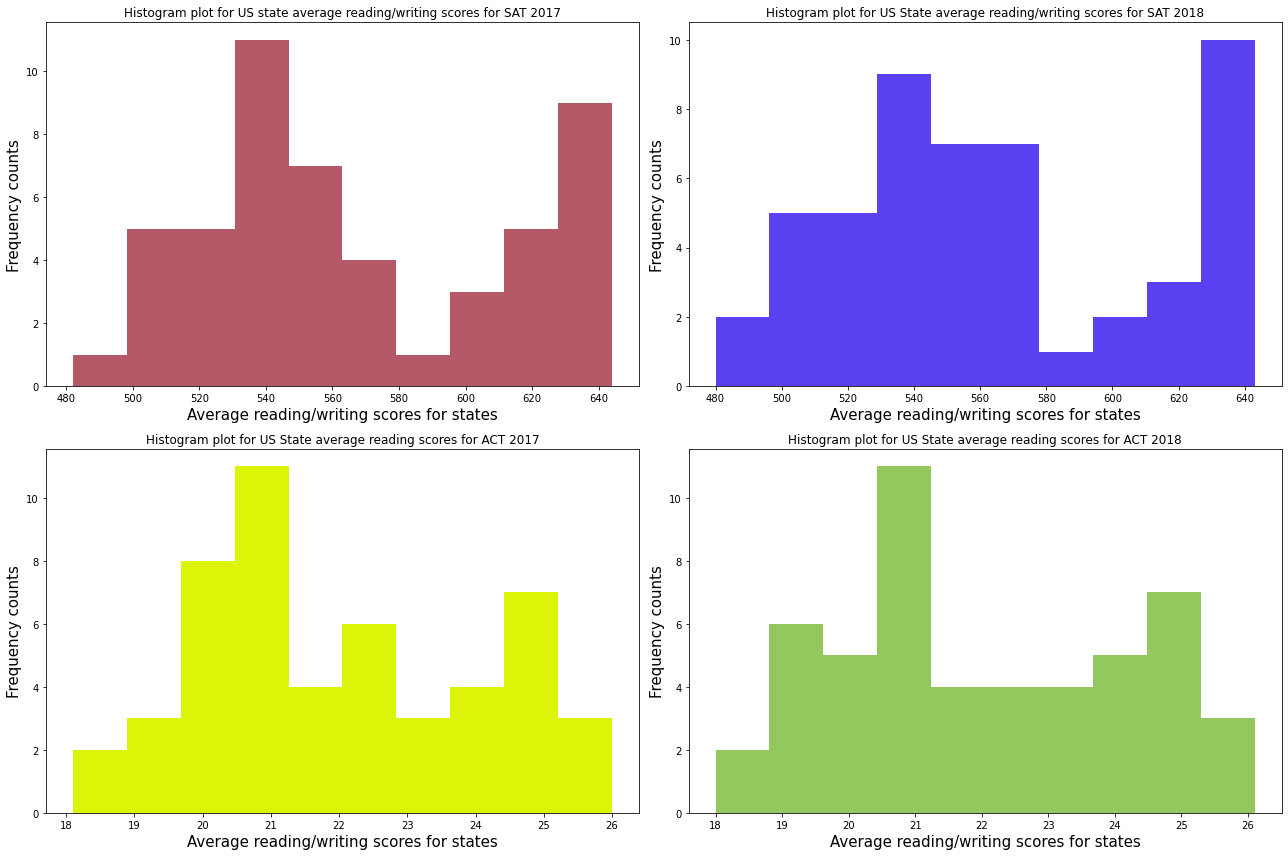

In [48]:
# Code
columns = ["sat17_ebrw","sat18_ebrw","act17_reading","act18_reading"]
titles = ["Histogram plot for US state average reading/writing scores for SAT 2017",\
          "Histogram plot for US State average reading/writing scores for SAT 2018",\
          "Histogram plot for US State average reading scores for ACT 2017",\
          "Histogram plot for US State average reading scores for ACT 2018"]
subplot_histograms(sat_act_df_copy,list_of_columns = columns,\
                   list_of_titles = titles,list_of_xlabels = ["Average reading/writing scores for states"])

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [49]:
def sns_scatterplots(dataframe, list_of_columns, title, xlabel, ylabel, savefig = None, savename = None):
    """
    This function generates a scatterplot for columns of interest based on.
    Takes in the following argument:
    @dataframe: pandas dataframe
    @list_of_columns: list of size(2) of corresponding pandas dataframe columns
    @title: title of plot in string format
    @xlabel: label for x-axis of scatterplot
    @ylabel: label for y-axis of scatterplot
    @savefig: Option to save figure
    @savename: name of figure provided to be saved (.png would be appended)
    """
    
    #Dictionary of US states abbreviations for labelling scatterplot points
    us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
    }
    if len(list_of_columns) != 2:
        raise Exception("Invalid size of column list. Requires exactly 2")
    plt.figure(figsize=(15,8))
    dataframe = dataframe.reset_index()
    
    # Create a state code column for plotting
    dataframe["code"] = dataframe["state"].map(us_state_abbrev)
    dataframe["state_code"] = dataframe["state"]+" ("+dataframe["code"]+")"
    sns.scatterplot(
        data=dataframe,
        x = list_of_columns[0],
        y = list_of_columns[1],
        hue= "state")
    for index, row in dataframe.iterrows():
        plt.text(row[list_of_columns[0]]-0.2, row[list_of_columns[1]]-0.2, row["code"])
    #Set the number of columns and location of legend to be outside of plot
    plt.legend(dataframe["state_code"],ncol = 3, bbox_to_anchor=(1.6, 1))
    # Set title
    plt.title(title)
    # Set x-axis label
    plt.xlabel(xlabel)
    # Set y-axis label
    plt.ylabel(ylabel)

    if savefig:
        plt.savefig(savename+".png")

### Scatter plot for US state average math score for SAT 2017 against ACT 2017

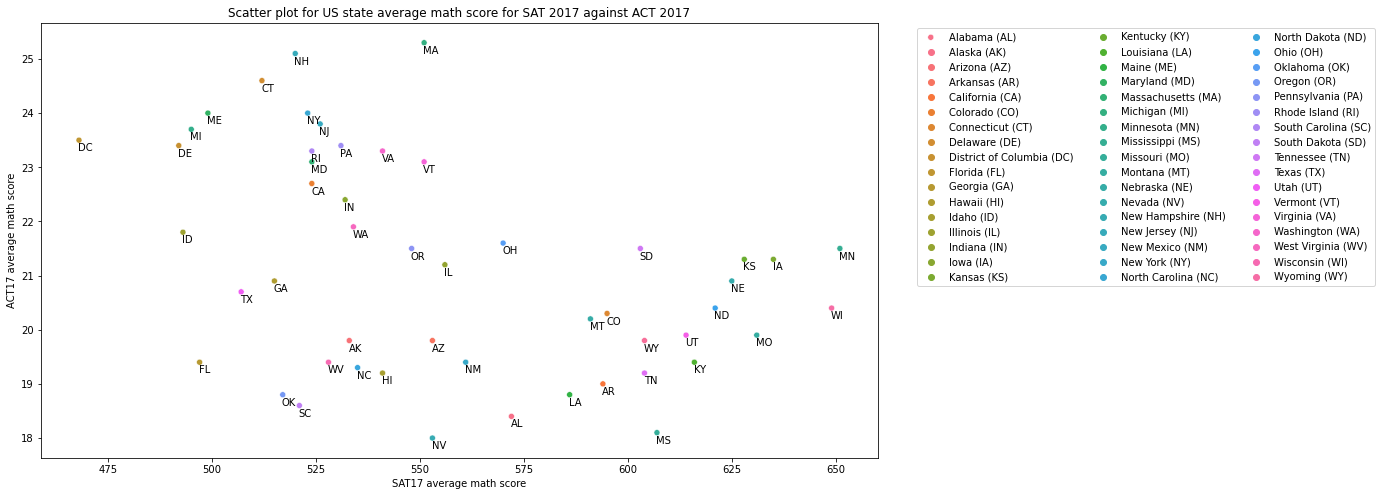

In [50]:
sns_scatterplots(
    dataframe = sat_act_df_copy,
    list_of_columns = ["sat17_math","act17_math"], 
    title = "Scatter plot for US state average math score for SAT 2017 against ACT 2017", 
    xlabel = "SAT17 average math score", 
    ylabel = "ACT17 average math score",
)

### Scatter plot for US state average verbal/reading score for SAT 2017 against ACT 2017

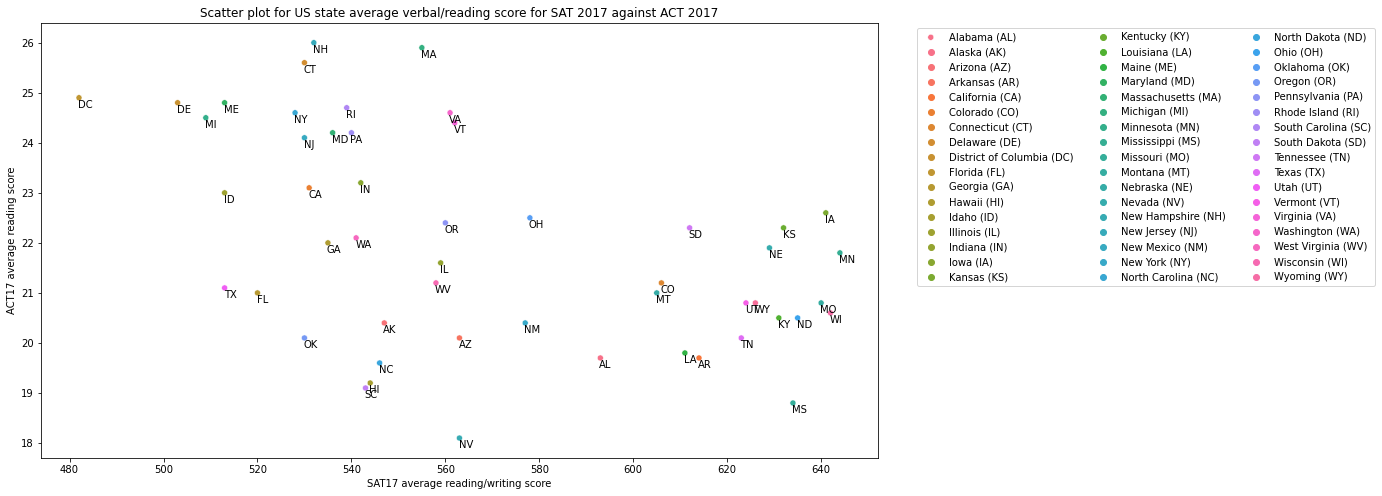

In [51]:
sns_scatterplots(
    dataframe = sat_act_df_copy,
    list_of_columns = ["sat17_ebrw","act17_reading"], 
    title = "Scatter plot for US state average verbal/reading score for SAT 2017 against ACT 2017", 
    xlabel = "SAT17 average reading/writing score", 
    ylabel = "ACT17 average reading score",
)

### Scatter plot for US state average total score for SAT 2017 against average composite score ACT 2017

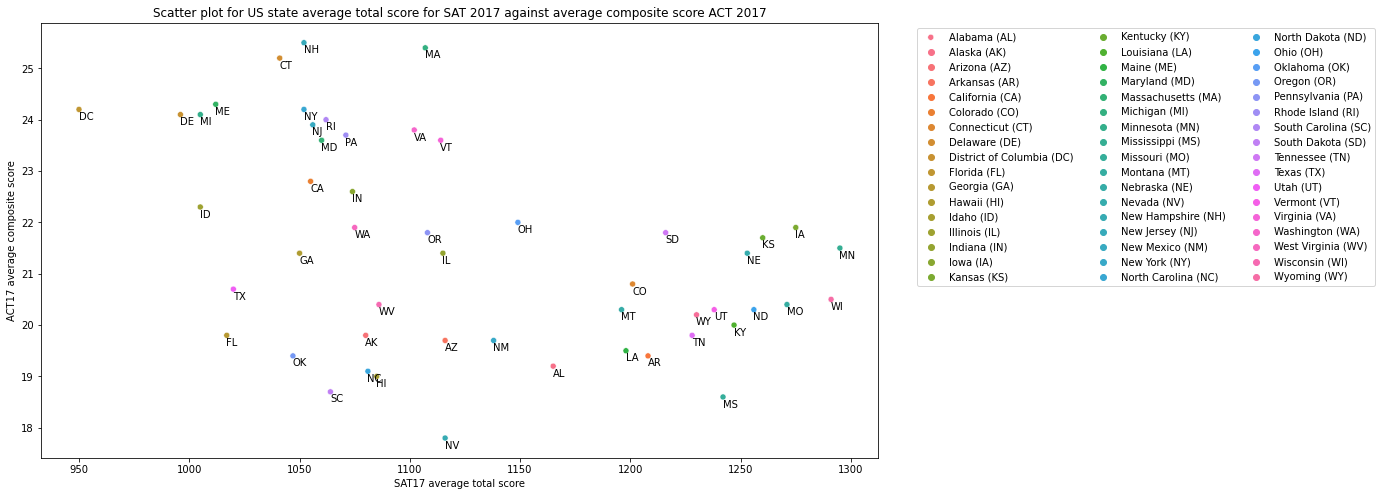

In [52]:
sns_scatterplots(
    dataframe = sat_act_df_copy,
    list_of_columns = ["sat17_total","act17_composite"], 
    title = "Scatter plot for US state average total score for SAT 2017 against average composite score ACT 2017", 
    xlabel = "SAT17 average total score", 
    ylabel = "ACT17 average composite score",
)

### Scatter plot for US state average total score for SAT 2017 vs. SAT 2018

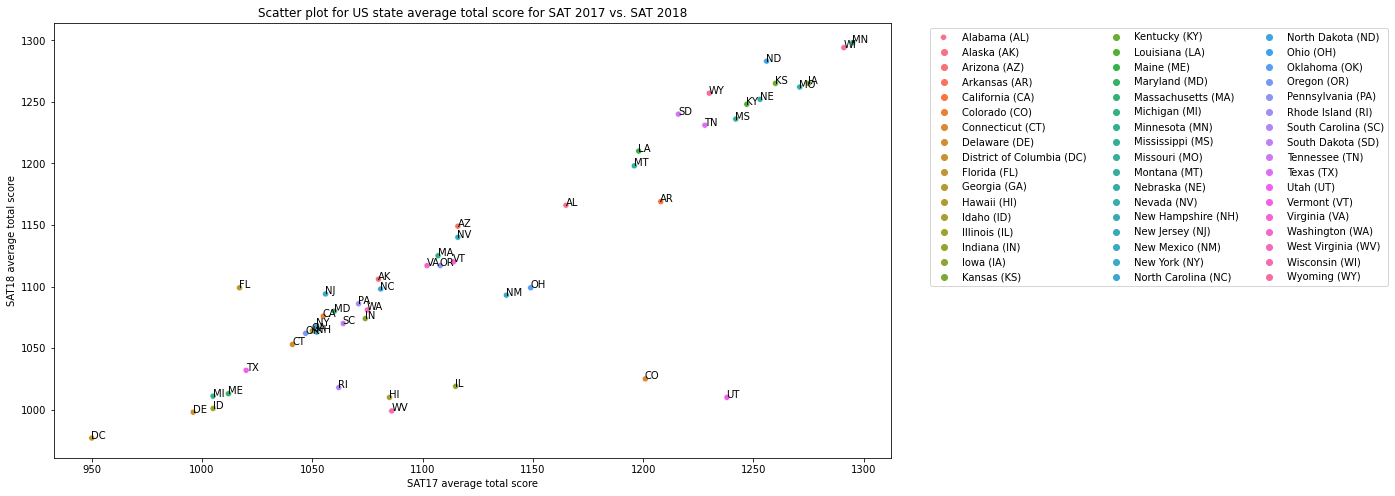

In [53]:
sns_scatterplots(
    dataframe = sat_act_df_copy,
    list_of_columns = ["sat17_total","sat18_total"], 
    title = "Scatter plot for US state average total score for SAT 2017 vs. SAT 2018", 
    xlabel = "SAT17 average total score", 
    ylabel = "SAT18 average total score",
)

# Scatter plot for US state average total score for ACT 2017 vs. ACT 2018

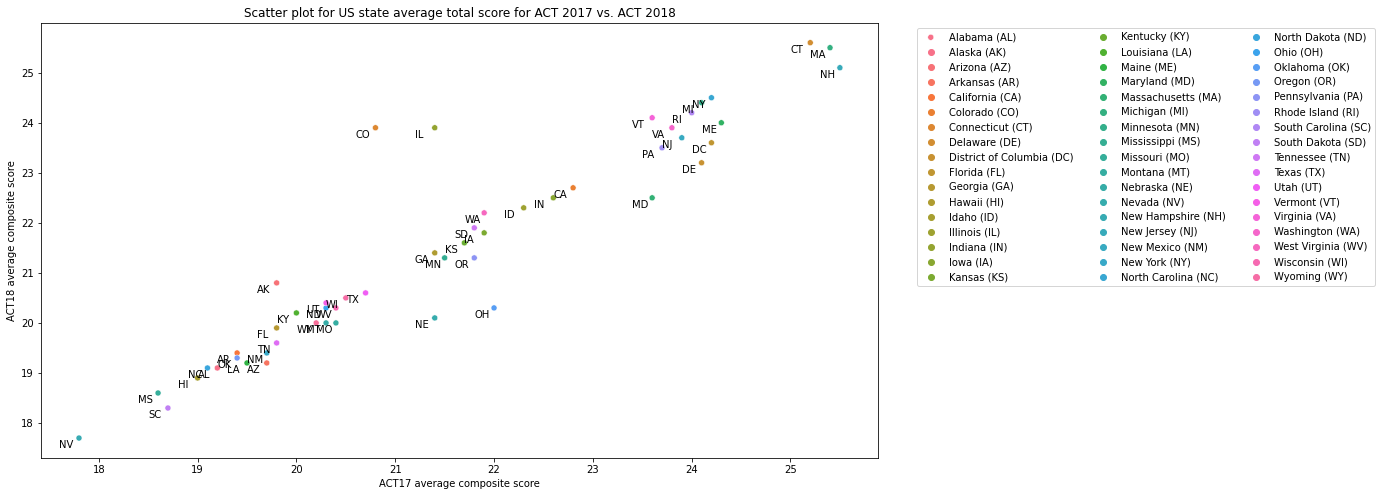

In [54]:
sns_scatterplots(
    dataframe = sat_act_df_copy,
    list_of_columns = ["act17_composite","act18_composite"], 
    title = "Scatter plot for US state average total score for ACT 2017 vs. ACT 2018", 
    xlabel = "ACT17 average composite score", 
    ylabel = "ACT18 average composite score",
)

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

# Create individual boxplots for columns with similar scale

In [55]:
def subplot_boxplot(dataframe, boxplot_group_dict):
    """
    This function generates box plots for dataframe columns with similar scales by
    using provided dataframe and a dictionary containing keys mapped to a
    list of provided dataframe columns of similar scale. Two separate dictionaries are used
    to facilitate the labelling of boxplot based on the key,value entries of boxplot_group_dict.
    Takes in the following argument:
    @dataframe: pandas dataframe
    @boxplot_group_dict: A dictionary that combine dataframe column name of similar data scale 
                        with self defined keys for the purpose of plotting boxplots within the same graph based
                        on dictionary keys.
    """
    
    # Dictionary used for labelling y axis based on keys from boxplot_group_dict
    group_to_table_dict = {
        "ACT subjects performance" : "Average score",
        "state participation of ACT and SAT exam" : "Participation rate in %",
        "SAT subjects performance" : "Average score",
        "SAT total" : "Average score "
    }
    # Dictionary used for labelling x axis tick marks based on dataframe column names
    column_to_name_dict = {
        "act17_pptn": "ACT 2017 Participation",
        "act17_english": "ACT 2017 English",
        "act17_math": "ACT 2017 Math",
        "act17_reading": "ACT 2017 Reading",
        "act17_science": "ACT 2017 Science",
        "act17_composite": "ACT 2017 Composite",
        "act18_pptn": "ACT 2018 Participation",
        "act18_composite": "ACT 2018 Composite",
        "act18_english": "ACT 2018 English",
        "act18_math": "ACT 2018 Math",
        "act18_reading": "ACT 2017 Reading",
        "act18_science": "ACT 2017 Science",
        "sat17_pptn": "SAT 2017 Participation",
        "sat17_ebrw": "SAT 2017 Reading/Writing",
        "sat17_math": "SAT 2017 Math",
        "sat17_total": "SAT 2017 English",
        "sat18_pptn": "SAT 2018 Participation",
        "sat18_ebrw": "SAT 2018 Reading/Writing",
        "sat18_math": "SAT 2018 Math",
        "sat18_total": "SAT 2018 Total"
    }

    nrows = len(boxplot_group_dict) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=1,figsize = (15,30)) # You'll want to specify your figsize
    for i, column in enumerate(boxplot_group_dict.keys()): # Gives us an index value to get into all our lists  
        ax[i].set_title("Boxplot of "+column+" across US states in 2017 and 2018")
        sns.boxplot(data=dataframe[boxplot_group_dict[column]],  orient='v' , ax=ax[i])
        ax[i].set_ylabel(group_to_table_dict[column],fontsize = 10)
        xticks_list = [column_to_name_dict[col] for col in boxplot_group_dict[column]]
        #print(ax[i].get_xticklabels(minor=True))
        ax[i].set_xticklabels(xticks_list,rotation = 45 ,ha = "right") 
    #Prevents overlap of titles,axes
    fig.tight_layout()

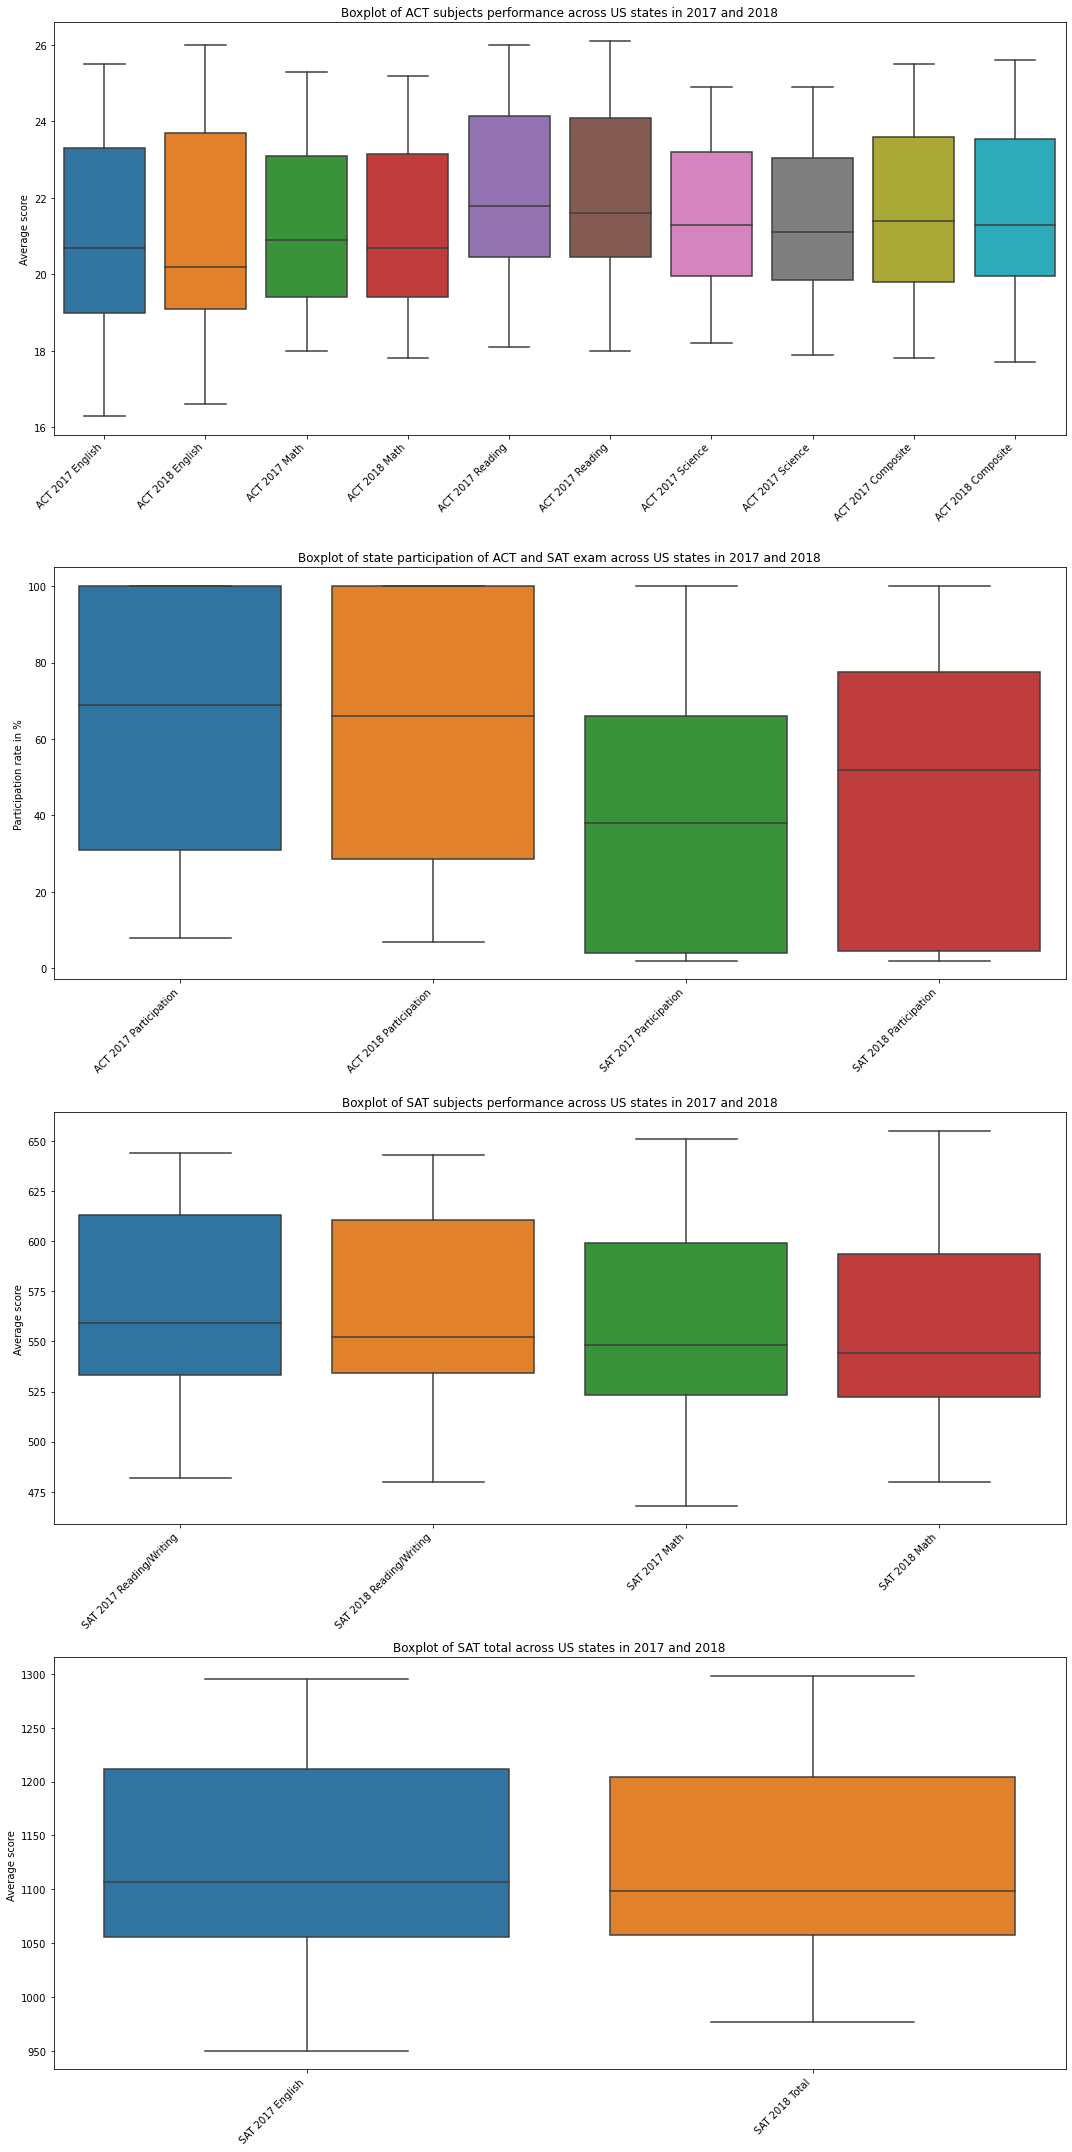

In [56]:
# Define a dictionary that groups dataframe columns with similar scale under a single key
boxplot_groups_dict = {
    "ACT subjects performance" : ['act17_english','act18_english','act17_math','act18_math','act17_reading',
                    'act18_reading','act17_science','act18_science','act17_composite','act18_composite'],
    "state participation of ACT and SAT exam" : ['act17_pptn','act18_pptn','sat17_pptn','sat18_pptn'],
    "SAT subjects performance" : ['sat17_ebrw','sat18_ebrw','sat17_math','sat18_math'],
    "SAT total" : ['sat17_total','sat18_total']
}

#Function call to plot boxplot based on above dictionary
subplot_boxplot(sat_act_df_copy, boxplot_groups_dict)

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

# Plot out the states participation rates for all test using scatter plot for overview.

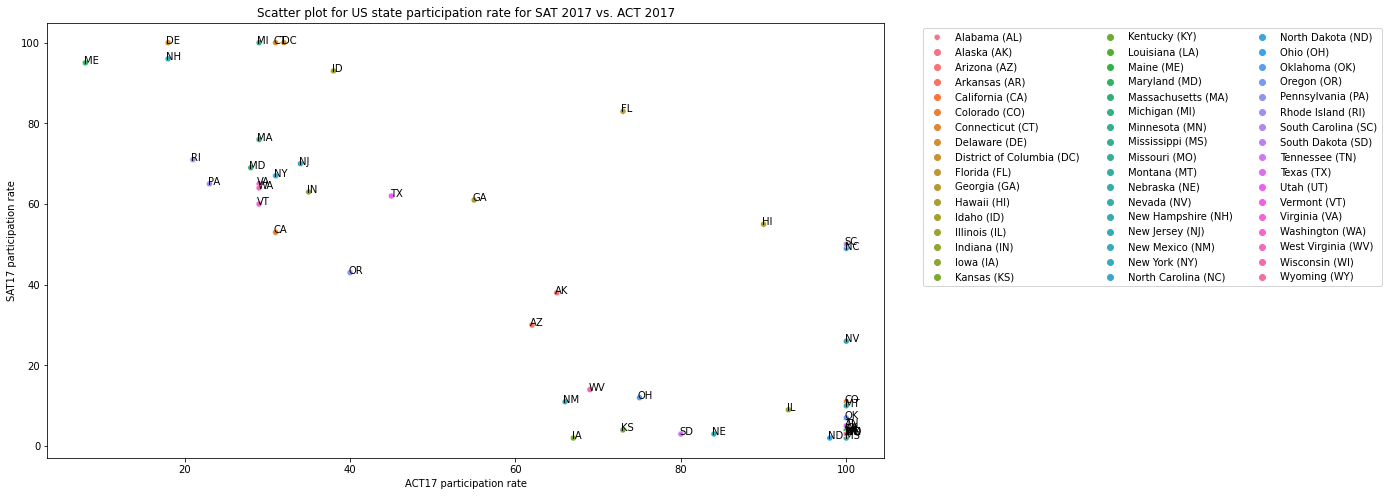

In [57]:
sns_scatterplots(
    dataframe = sat_act_df_copy,
    list_of_columns = ["act17_pptn","sat17_pptn"], 
    title = "Scatter plot for US state participation rate for SAT 2017 vs. ACT 2017", 
    xlabel = "ACT17 participation rate", 
    ylabel = "SAT17 participation rate",
    savefig = True,
    savename = "sat_act_2017"
)

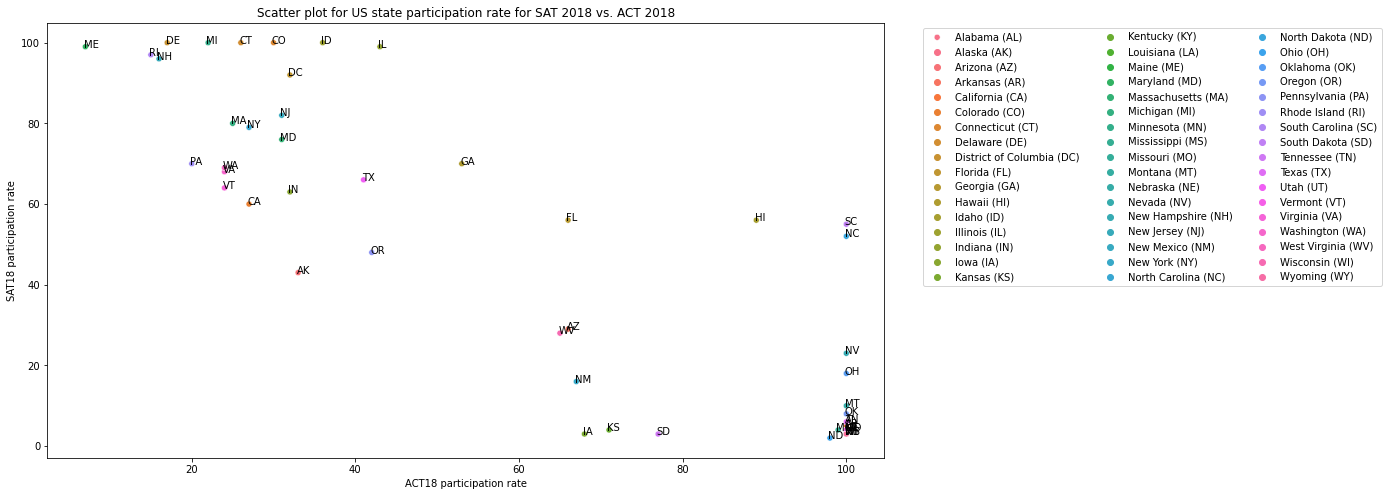

In [58]:
sns_scatterplots(
    dataframe = sat_act_df_copy,
    list_of_columns = ["act18_pptn","sat18_pptn"], 
    title = "Scatter plot for US state participation rate for SAT 2018 vs. ACT 2018", 
    xlabel = "ACT18 participation rate", 
    ylabel = "SAT18 participation rate",
    savefig = True,
    savename = "sat_act_2018"
)

# Plot the participation rate in descending order for SAT 2018 and get the state having median value for participation rate

['North Carolina']


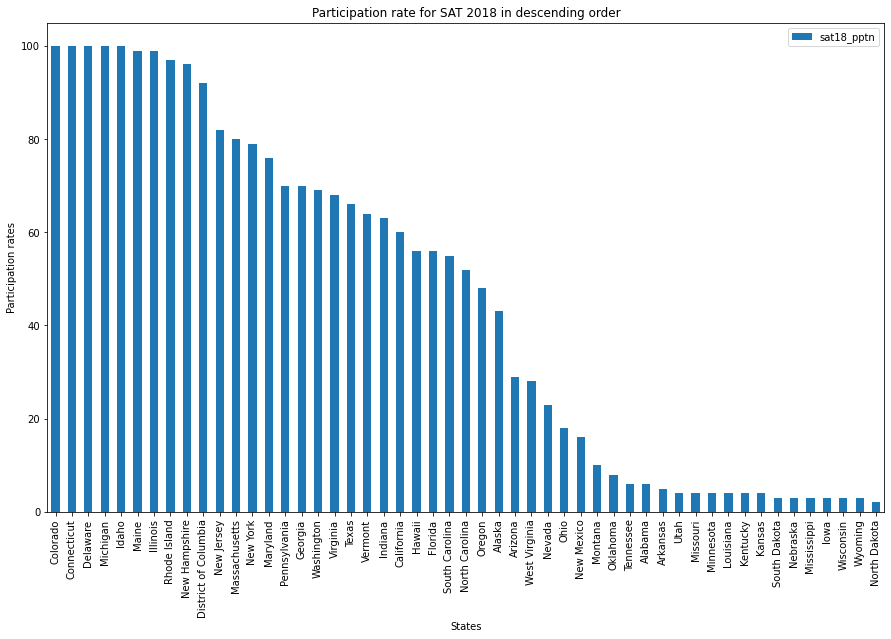

In [73]:
print(sat_act_df[sat_act_df["sat18_pptn"] == 52]["sat18_pptn"].index.values) #North Carolina
sat_act_df[["sat18_pptn"]].sort_values(by = "sat18_pptn",
                                ascending = False).plot(kind = 'bar',figsize = (15,9),xlabel= "States",ylabel="Participation rates",title="Participation rate for SAT 2018 in descending order");

In [72]:
sat_act_df.describe()

,act17_pptn,act17_english,act17_math,act17_reading,act17_science,act17_composite,act18_pptn,act18_composite,act18_english,act18_math,...,sat17_pptn,sat17_ebrw,sat17_math,sat17_total,sat18_pptn,sat18_ebrw,sat18_math,sat18_total,sat_pptn_change,act_pptn_change
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,...,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,65.254902,20.931373,21.182353,22.013725,21.450980,21.519608,61.647059,21.486275,20.988235,21.125490,...,39.803922,569.117647,556.882353,1126.098039,45.745098,563.686275,556.235294,1120.019608,5.941176,-3.607843
std,32.140842,2.353677,1.981989,2.067271,1.739353,2.020695,34.080976,2.106278,2.446356,2.035765,...,35.276632,45.666901,47.121395,92.494812,37.314256,47.502627,47.772623,94.155083,18.271740,13.447793
min,8.000000,16.300000,18.000000,18.100000,18.200000,17.800000,7.000000,17.700000,16.600000,17.800000,...,2.000000,482.000000,468.000000,950.000000,2.000000,480.000000,480.000000,977.000000,-27.000000,-70.000000
25%,31.000000,19.000000,19.400000,20.450000,19.950000,19.800000,28.500000,19.950000,19.100000,19.400000,...,4.000000,533.500000,523.500000,1055.500000,4.500000,534.500000,522.500000,1057.500000,0.000000,-4.000000
50%,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000,66.000000,21.300000,20.200000,20.700000,...,38.000000,559.000000,548.000000,1107.000000,52.000000,552.000000,544.000000,1098.000000,1.000000,-1.000000
75%,100.000000,23.300000,23.100000,24.150000,23.200000,23.600000,100.000000,23.550000,23.700000,23.150000,...,66.000000,613.000000,599.000000,1212.000000,77.500000,610.500000,593.500000,1204.000000,5.000000,0.000000
max,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000,100.000000,25.600000,26.000000,25.200000,...,100.000000,644.000000,651.000000,1295.000000,100.000000,643.000000,655.000000,1298.000000,90.000000,25.000000


In [60]:
# Check popularity of ACT and SAT participation

sat_act_df['act17_more'] = np.where(sat_act_df["act17_pptn"] > sat_act_df["sat17_pptn"], 'True', 'False')
sat_act_df['act18_more'] = np.where(sat_act_df["act18_pptn"] > sat_act_df["sat18_pptn"], 'True', 'False')
print(sat_act_df['act17_more'].value_counts())
print(sat_act_df['act18_more'].value_counts())

True     29
False    22
Name: act17_more, dtype: int64
True     27
False    24
Name: act18_more, dtype: int64


In [61]:
# Sort 

# Consider the rate of change in participation rate for states having 100% participation rate in one of 4 tests

In [62]:
def barplot_annotation(plots):
    for p in plots.patches:
        plots.annotate(format(p.get_height(), '.0f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       size=10,
                       xytext = (0, 12), 
                       textcoords = 'offset points')

Index(['act17_pptn', 'act18_pptn', 'act_pptn_change', 'sat17_pptn',
       'sat18_pptn', 'sat_pptn_change'],
      dtype='object')


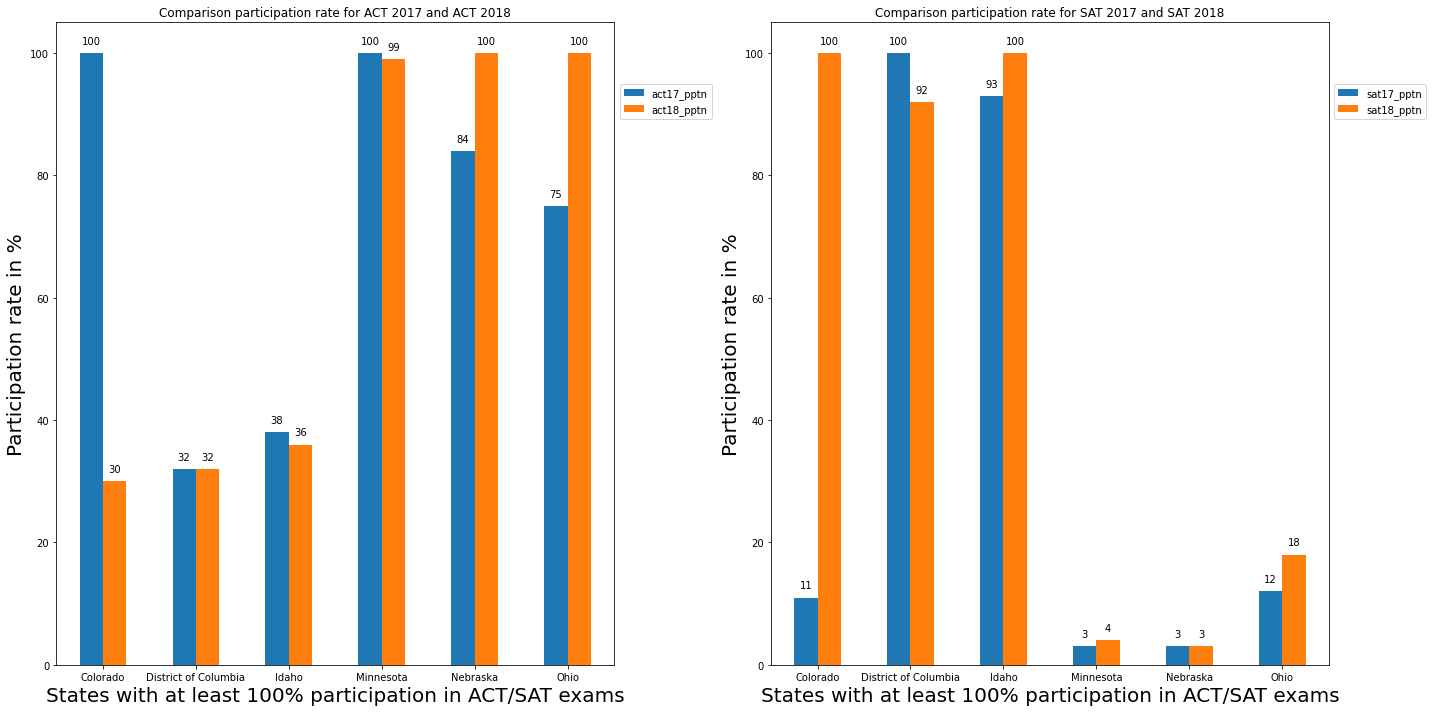

In [63]:

print(max_participation_df.columns)
fig, ax = plt.subplots(1,2)
fig.figsize = (30,20)
#max_participation_df.drop(["act_pptn_change","sat_pptn_change"],axis=1,inplace = True)
ax[0] = max_participation_df[["act17_pptn","act18_pptn"]].plot(ax=ax[0],kind = "bar",
                            figsize = (20,10));
ax[0].set_xlabel("States with at least 100% participation in ACT/SAT exams",fontsize=20)
ax[0].set_ylabel("Participation rate in %",fontsize=20)
ax[0].set_title("Comparison participation rate for ACT 2017 and ACT 2018")
ax[0].set_xticklabels(labels = max_participation_df.index,rotation = 0, fontsize = 10);
ax[0].legend(loc=(1.01,0.85))

barplot_annotation(ax[0])
ax[1] = max_participation_df[["sat17_pptn","sat18_pptn"]].plot(ax=ax[1],kind = "bar",
                            figsize = (20,10), title = "Comparison participation rate for SAT 2017 and SAT 2018");
ax[1].set_xlabel("States with at least 100% participation in ACT/SAT exams",fontsize=20)
ax[1].set_ylabel("Participation rate in %",fontsize=20)
ax[1].set_title("Comparison participation rate for SAT 2017 and SAT 2018")
ax[1].legend(loc=(1.01,0.85))
ax[1].set_xticklabels(labels = max_participation_df.index, rotation = 0, fontsize = 10);
barplot_annotation(ax[1])
fig.tight_layout()

# Consider all states which maintained at least 50% participation rate for ACT and SAT for 2017 and 2018

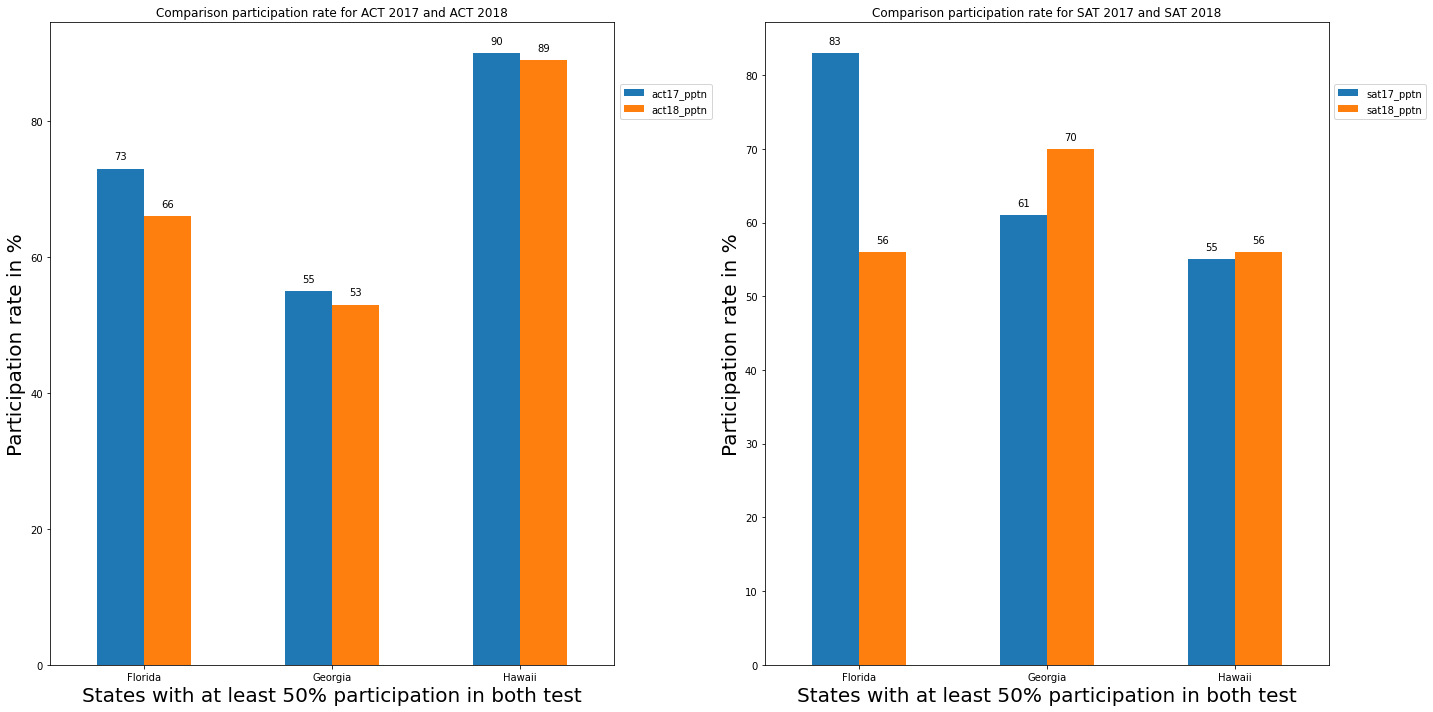

In [64]:
states_more_than_50pct_pptn = sat_act_df[((sat_act_df["sat17_pptn"] > 50) & (sat_act_df["act17_pptn"] > 50)) & \
                                           ((sat_act_df["sat18_pptn"] > 50) & (sat_act_df["act18_pptn"] > 50))][["act17_pptn","act18_pptn","sat17_pptn","sat18_pptn"]]
fig, ax = plt.subplots(1,2)
fig.figsize = (30,20)
#max_participation_df.drop(["act_pptn_change","sat_pptn_change"],axis=1,inplace = True)
states_more_than_50pct_pptn[["act17_pptn","act18_pptn"]].plot(
                            ax=ax[0],
                            kind = "bar",
                            figsize = (20,10)
);
ax[0].set_xlabel("States with at least 50% participation in both test",fontsize=20)
ax[0].set_ylabel("Participation rate in %",fontsize=20)
ax[0].set_title("Comparison participation rate for ACT 2017 and ACT 2018")
ax[0].set_xticklabels(labels = states_more_than_50pct_pptn.index,rotation = 0, fontsize = 10);
ax[0].legend(loc=(1.01,0.85))
barplot_annotation(ax[0])
ax[1] = states_more_than_50pct_pptn[["sat17_pptn","sat18_pptn"]].plot(
                            ax=ax[1],kind = "bar",
                            figsize = (20,10),
                            title = "Comparison participation rate for SAT 2017 and SAT 2018"
);
ax[1].set_xlabel("States with at least 50% participation in both test",fontsize=20)
ax[1].set_ylabel("Participation rate in %",fontsize=20)
ax[1].set_title("Comparison participation rate for SAT 2017 and SAT 2018")
ax[1].legend(loc=(1.01,0.85))
ax[1].set_xticklabels(labels = states_more_than_50pct_pptn.index, rotation = 0, fontsize = 10);
barplot_annotation(ax[1])
fig.tight_layout()

# Consider all states which has biggest drop/gain in either ACT or/and SAT

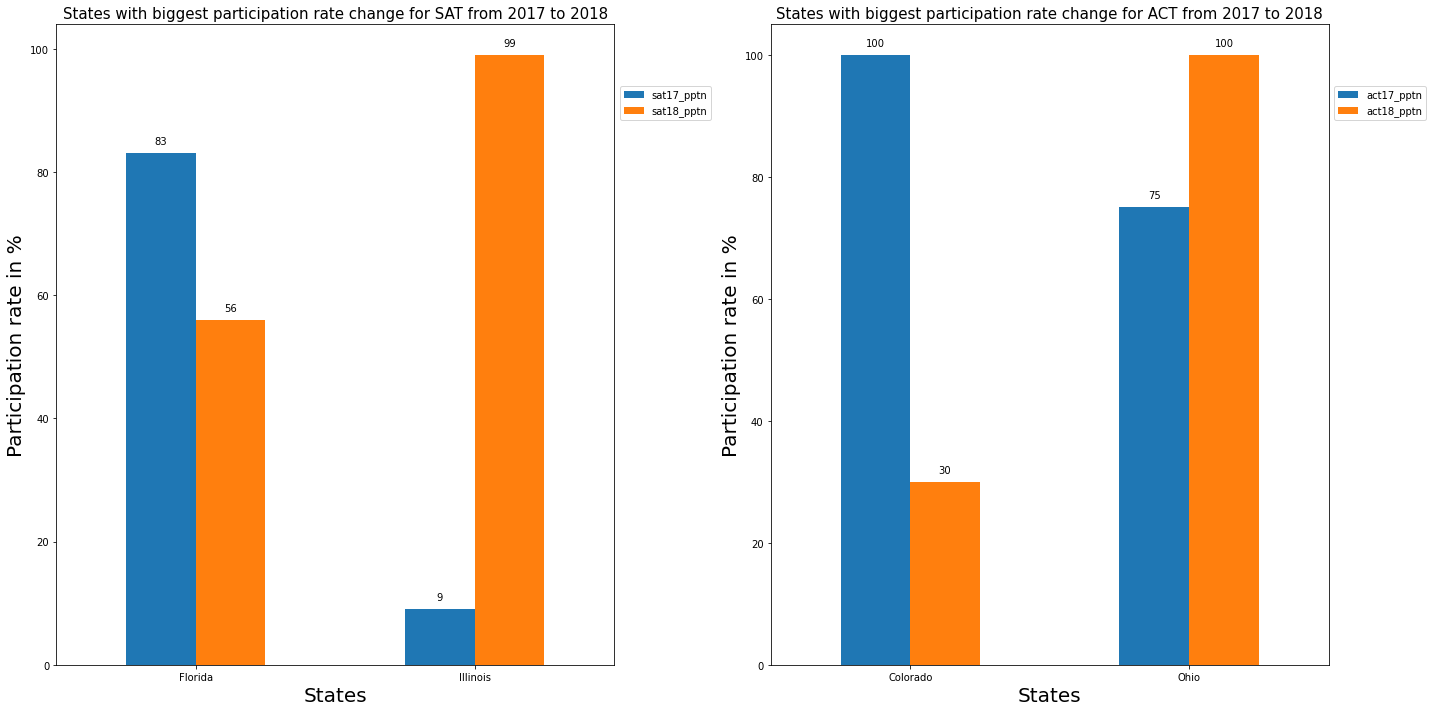

In [65]:
# Filter out states with biggest change in SAT participation rate
states_big_diff_pptn_sat = sat_act_df[(sat_act_df["sat_pptn_change"] == sat_act_df["sat_pptn_change"].min()) |
                                  (sat_act_df["sat_pptn_change"] == sat_act_df["sat_pptn_change"].max())
                                 ][["sat17_pptn","sat18_pptn"]]
# Filter out states with biggest change in ACT participation rate
states_big_diff_pptn_act = sat_act_df[(sat_act_df["act_pptn_change"] == sat_act_df["act_pptn_change"].min()) |
                                (sat_act_df["act_pptn_change"] == sat_act_df["act_pptn_change"].max())
                                 ][["act17_pptn","act18_pptn"]]



#print(states_big_diff_pptn.head())
fig, ax = plt.subplots(1,2)
fig.figsize = (30,20)
#max_participation_df.drop(["act_pptn_change","sat_pptn_change"],axis=1,inplace = True)
states_big_diff_pptn_sat.plot(
                    ax=ax[0],
                    kind = "bar",
                    figsize = (20,10)
);
ax[0].set_xlabel("States", fontsize=20)
ax[0].set_ylabel("Participation rate in %",fontsize=20)
ax[0].set_title("States with biggest participation rate change for SAT from 2017 to 2018",fontsize=15)
ax[0].set_xticklabels(labels = states_big_diff_pptn_sat.index,rotation = 0, fontsize = 10);
ax[0].legend(loc=(1.01,0.85))
barplot_annotation(ax[0])


states_big_diff_pptn_act.plot(
                    ax=ax[1],
                    kind = "bar",
                    figsize = (20,10)
);

ax[1].set_xlabel("States",fontsize=20)
ax[1].set_ylabel("Participation rate in %",fontsize=20)
ax[1].set_title("States with biggest participation rate change for ACT from 2017 to 2018",fontsize = 15)
ax[1].set_xticklabels(labels = states_big_diff_pptn_act.index, rotation = 0, fontsize = 10);
ax[1].legend(loc=(1.01,0.85))
barplot_annotation(ax[1])

fig.tight_layout()

# Consider comparing the participation rate of states for both ACT and SAT which have biggest drop/gain in either tests

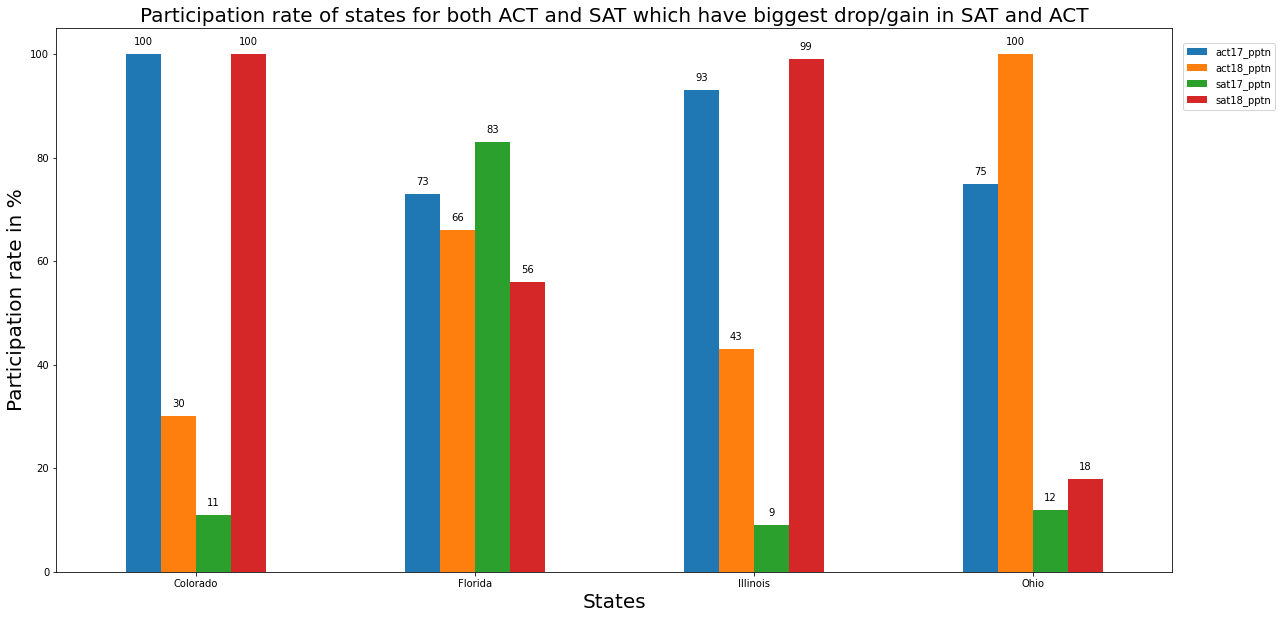

In [66]:
# Filter out all states with biggest change and compare their respective ACT and SAT participation rates
states_big_diff_pptn = sat_act_df[(sat_act_df["sat_pptn_change"] == sat_act_df["sat_pptn_change"].min()) |
                                (sat_act_df["sat_pptn_change"] == sat_act_df["sat_pptn_change"].max()) |
                                (sat_act_df["act_pptn_change"] == sat_act_df["act_pptn_change"].min()) |
                                (sat_act_df["act_pptn_change"] == sat_act_df["act_pptn_change"].max()) 
                                 ][["act17_pptn","act18_pptn","sat17_pptn","sat18_pptn"]]


#print(states_big_diff_pptn.head())
fig, ax = plt.subplots()
states_big_diff_pptn.plot(
                    ax = ax,
                    kind = "bar",
                    figsize = (20,10)
);
ax.set_xlabel("States",fontsize=20)
ax.set_ylabel("Participation rate in %",fontsize=20)
ax.set_title("Participation rate of states for both ACT and SAT which have biggest drop/gain in SAT and ACT",
            fontsize = 20)
ax.set_xticklabels(labels = states_big_diff_pptn.index,rotation = 0, fontsize = 10);
ax.legend(loc=(1.01,0.85))
barplot_annotation(ax)

# Consider comparing the participation rate of states which has a positive change in one test and negative in another

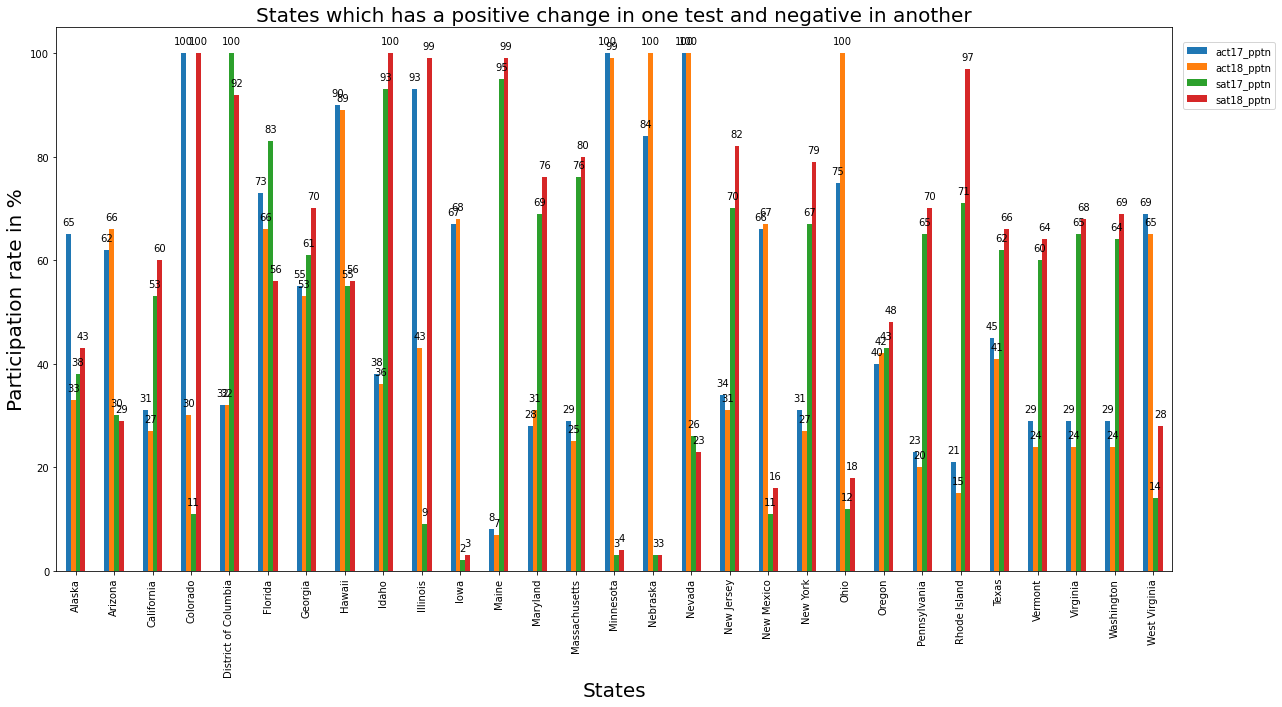

In [67]:

states_big_diff_pptn = sat_act_df[(sat_act_df["sat_pptn_change"] > 0) &
                                (sat_act_df["act_pptn_change"] < 0) |
                                (sat_act_df["sat_pptn_change"] < 0) |
                                (sat_act_df["act_pptn_change"] > 0 ) 
                                 ][["act17_pptn","act18_pptn","sat17_pptn","sat18_pptn"]]


#print(states_big_diff_pptn.head())
fig, ax = plt.subplots()
states_big_diff_pptn.plot(
                    ax = ax,
                    kind = "bar",
                    figsize = (20,10)
);
ax.set_xlabel("States",fontsize=20)
ax.set_ylabel("Participation rate in %",fontsize=20)
ax.set_title("States which has a positive change in one test and negative in another",
            fontsize = 20)
ax.set_xticklabels(labels = states_big_diff_pptn.index,rotation = 90, fontsize = 10);
ax.legend(loc=(1.01,0.85))
barplot_annotation(ax)

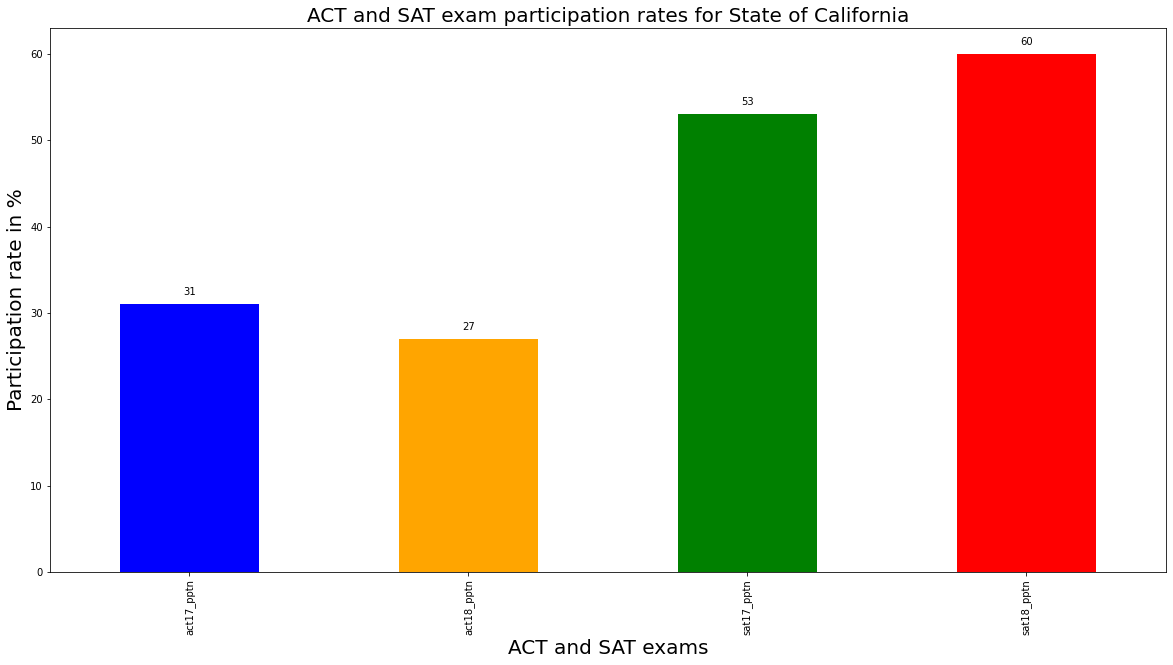

In [68]:
# Plot participation rate for California
fig, ax = plt.subplots()
states_big_diff_pptn.loc["California",:].plot(
                    ax = ax,
                    kind = "bar",color = ['blue','orange','green','red'],
                    figsize = (20,10)
);
ax.set_xlabel("ACT and SAT exams",fontsize=20)
ax.set_ylabel("Participation rate in %",fontsize=20)
ax.set_title("ACT and SAT exam participation rates for State of California",
            fontsize = 20)
barplot_annotation(ax)
fig.savefig("California_pptn.png")

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

|Feature|Mean|Median|Mode|InterQuartile Range|Standard deviation|Skewness|
|---|---|---|---|---|---|---|
|**act17_pptn** (in %)|65.25|69|100|69|32.14|-0.197989|
|**act17_english**|20.93|20.7|19, 19.5, 21.2|4.3|2.35|0.352660|
|**act17_math**|21.18|20.9|19.4|3.7|1.98|0.332683|
|**act17_reading**|22.01|21.8|20.1, 20.8|3.7|2.07|0.269366|
|**act17_science**|21.04|21.3|20.5, 20.6, 20.9,22|2.85|3.18|-4.099534|
|**act17_composite**|21.52|21.4|19.8, 20.3, 21.4|3.8|2.02|0.319810|
|**act18_pptn** (in %)|61.64|66|100|71.5|34.08|-0.021916|
|**act18_composite**|21.49|21.3|20, 20.3, 23.9|3.6|2.11|0.281962|
|**act18_english**|20.99|20.2|18.2, 19.8, 23.8|4.6|2.45|0.371507|
|**act18_math**|21.13|20.7|19.7, 20.3, 23.6|3.75|2.04|0.269548|
|**act18_reading**|22.02|21.6|24.7|3.65|2.17|0.201361|
|**act18_science**|21.35|21.1|22.2, 23.4, 23.5|3.2|1.87|0.172383|
|**sat17_pptn** (in %)|39.80|38|3|62|35.28|0.346450|
|**sat17_ebrw**|569.12|559|513, 530|79.5|45.67|0.272693|
|**sat17_math**|556.88|548|524|76.5|47.12|0.365040|
|**sat17_total**|1126.10|1107|1005, 1052, 1116|156.5|92.49|0.310903|
|**sat18_pptn** (in %)|45.75|52|3, 4|73|37.31|0.136228| 
|**sat18_ebrw**|563.69|552|513, 547, 633|76|47.50|0.282300|
|**sat18_math**|556.24|544|506, 530, 547, 618, 631|71|47.77|0.530407|
|**sat18_total**|1120.02|1098|1010, 1099, 1177, 1265|146.5|94.16|0.466432|

Answer: 

The above table summarises the distributions of data for each column across all US states.

The **mean** score for ACT subjects (English, Math, Reading and Science) and ACT composite score for 2017 and 2018 for all states is about 21, with **median** close to 21, based on the **mean** participation rate of around 61.6% and 65.3% respectively. The **standard deviations** and **interquartile range** for the subjects and composite score for both years are similar which were calculated to be about 2 to 3 and approximately 3 and 4 respectively.

For SAT subjects (Math and Evidenced-based Reading and Writing), the average **mean** score across all US states is about 560, with **median** close to 550 for year 2017 and 2018 based on the *8mean** participation rate of around 39.8% and 45.8% respectively. Furthermore, the **mean** SAT total score both both years are about 1120. The **standard deviations** and **interquartile range** for the subjects and total score for both years are similar which were calculated to be approximately 46 and approximately 93 respectively.

Columns which are **negatively skewed** are the participation rate for ACT 2017 and state mean score for ACT 2017 science subject represented by features *act17_pptn* and *act17_science*. The other columns are **slightly positively skewed** with values less than 1.

The statistics dervied are supported by the code in the next code cell.

In [69]:
#Print descriptive statistics, mode and skew values across numeric columns 
print(sat_act_df_copy.describe())
print(sat_act_df_copy.mode(numeric_only = True))
print(sat_act_df_copy.skew(axis=0))

       act17_pptn  act17_english  act17_math  act17_reading  act17_science  \
count   51.000000      51.000000   51.000000      51.000000      51.000000   
mean    65.254902      20.931373   21.182353      22.013725      21.450980   
std     32.140842       2.353677    1.981989       2.067271       1.739353   
min      8.000000      16.300000   18.000000      18.100000      18.200000   
25%     31.000000      19.000000   19.400000      20.450000      19.950000   
50%     69.000000      20.700000   20.900000      21.800000      21.300000   
75%    100.000000      23.300000   23.100000      24.150000      23.200000   
max    100.000000      25.500000   25.300000      26.000000      24.900000   

       act17_composite  act18_pptn  act18_composite  act18_english  \
count        51.000000   51.000000        51.000000      51.000000   
mean         21.519608   61.647059        21.486275      20.988235   
std           2.020695   34.080976         2.106278       2.446356   
min          17.8

#### We generally assume that data we sample from a population will be normally distributed. Do we observe this trend?

Answer: We do not observe this trend as the calculated skewness of all columns are not infinitesimally close to the skew value of 0 for a normal distribution. The mean, median and mode for all columns are not equal as shown from the .describe method previously.

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

**Answer**: The assumption does not hold for math as mentioned above. 

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

**Answer:** We should not conduct statistical inference since there may be participants who took both exams on a given year which contributes to the participation rate which independence of observations is a factor in determining if statistical inference is required

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

**Answer:** It is not appropriate to compare these SAT and ACT score as the way each test presents its questions is markedly different, as well as the focus of specific math topics for the test differ across both exams which could provide certain biasness for students who are strong in specific topics that would be tested.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [70]:
# Code:

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

The three states of interest with interesting trends are 
1) Colorado which has a significant large drop of 70% from 100% to 30% for ACT and increase of 89% from 11% to 100% SAT participation rate from 2017 to 2018 datasets.

2) Illinois which has a surge of 90% in SAT participation from 9% to 99% and a drop of 50% in ACT participation from 2017 to 2018 datasets.

3) Alaska which have a drop of 32% in ACT participation from 65% to 33% and a small increase of 5% in SAT participation from 38% to 43% datasets.

Note that students in the US take the SAT/ACT in Year 11 and do not graduate until Year 12, their results would only be reflected in the official SAT/ACT report of the following year. I.e., students taking the tests in 2017 would have been from the class of 2018, and would be included in the 2018 SAT/ACT reports).

#### Colorado
In Colorado state, ACT was mandated for all high school junior since 2001, until 2017 where the Colorado and the College Board partnered had decided to make the switch to SAT instead of ACT as the state’s accountability exam which was made compulsory for all high school juniors starting with the first SAT test on 11 April 2017 for school year 2016-2017. As a result, we see a decline in ACT participation and huge increase in SAT participation thereafter.
Ref: 
- https://www.testive.com/colorado-sat-change-2017/ 
- https://blog.prepscholar.com/which-states-require-the-sat
- https://www.coloradokids.org/wp-content/uploads/2016/01/ACTvsSAT_FINAL.pdf 

#### Illinois
In Illinois state, it has sponsored the cost for administering ACT many years for free up to the ACT expiry in summer 2015. Subsequently, ACT exam would not be provided by the state. Due to budget impasse in 2016 resulting in no budget allocated for state wide testing for the year, some districts offered the ACT exam for free at their own expenses while the others offered SAT exam in conjunction with College Board. Subsequently in late 2016, the Illinois Board Education decided to adopt SAT as state exam and administered in 2017 to replace the PARCC ( Partnership for Assessment of Readiness for College and Careers) state exam which was introduced in spring 2015 and 2016 that was not well received by the state population. Hence, this likely explained the cause for such signifcant change in ACT and SAT participation rate. 

Ref: 
- https://www.testive.com/illinois/
- https://blog.prepscholar.com/which-states-require-the-sat
- https://www.bnd.com/news/local/article50939170.html 
- https://www.chicagotribune.com/news/breaking/ct-parcc-test-high-school-met-20160711-story.html

#### Alaska
Alaska had removed mandatory testing requirements (either SAT, ACT or WorkKeys test)for high school graduation effective from June 2016. As a result, the class of 2017 would have the option to decide on taking the specified tests, which likely resulted in some students forgoing the tests, causing a decline in participation rates. However, there is signifcant evidence that could suggest on the drop for ACT participation, but a possible explanation could be due to possible change college admission requirements and perceived ease of the tests by the state population.

Ref: 
- https://blog.prepscholar.com/which-states-require-the-sat
- https://www.adn.com/alaska-news/education/2016/06/30/students-no-longer-need-national-tests-to-graduate/

Index(['act17_pptn', 'act18_pptn', 'act_pptn_change', 'sat17_pptn',
       'sat18_pptn', 'sat_pptn_change'],
      dtype='object')


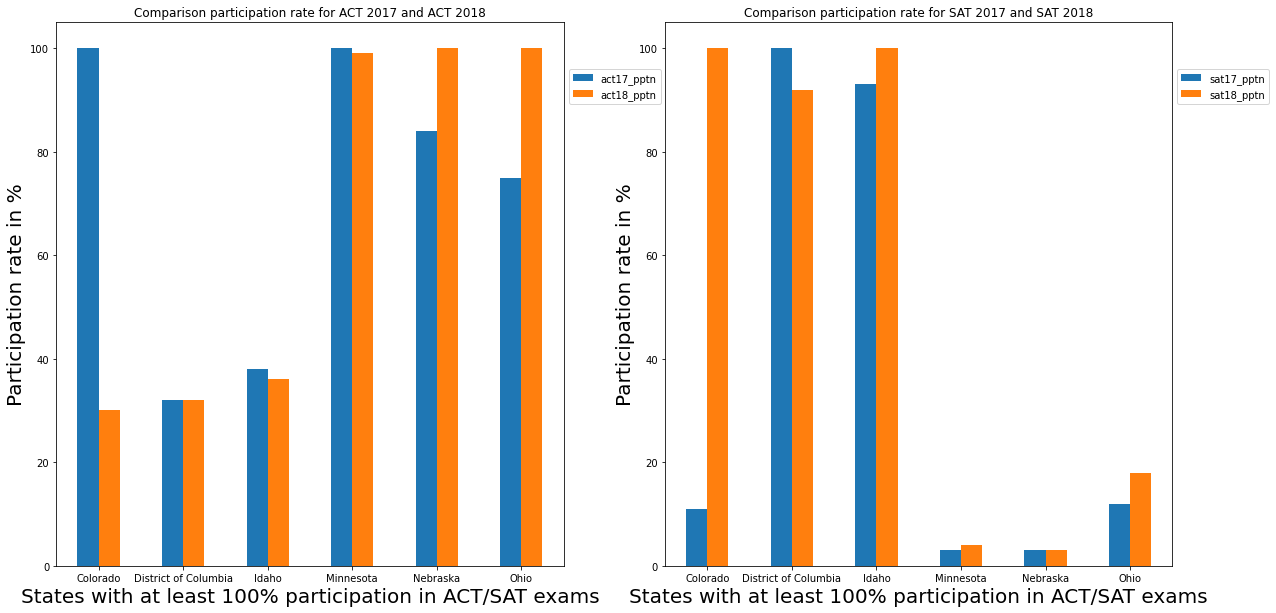

In [71]:
# Consider the rate of change in participation rate for states having 100% participation rate in one of 4 tests
print(max_participation_df.columns)
fig, ax = plt.subplots(1,2)
fig.figsize = (30,20)
#max_participation_df.drop(["act_pptn_change","sat_pptn_change"],axis=1,inplace = True)
max_participation_df[["act17_pptn","act18_pptn"]].plot(ax=ax[0],kind = "bar",
                            figsize = (20,10));
ax[0].set_xlabel("States with at least 100% participation in ACT/SAT exams",fontsize=20)
ax[0].set_ylabel("Participation rate in %",fontsize=20)
ax[0].set_title("Comparison participation rate for ACT 2017 and ACT 2018")
ax[0].set_xticklabels(labels = max_participation_df.index,rotation = 0, fontsize = 10);
ax[0].legend(loc=(1.01,0.85))

ax[1] = max_participation_df[["sat17_pptn","sat18_pptn"]].plot(ax=ax[1],kind = "bar",
                            figsize = (20,10), title = "Comparison participation rate for SAT 2017 and SAT 2018");
ax[1].set_xlabel("States with at least 100% participation in ACT/SAT exams",fontsize=20)
ax[1].set_ylabel("Participation rate in %",fontsize=20)
ax[1].set_title("Comparison participation rate for SAT 2017 and SAT 2018")
ax[1].legend(loc=(1.01,0.85))
ax[1].set_xticklabels(labels = max_participation_df.index, rotation = 0, fontsize = 10);

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

From the above analysis, the key takeaways are:

In general, high participation rates in one test usually means low participation rates in the other. ACT is still widely sought after examination compared to SAT with 29 states having higher participation for ACT in 2017 and 27 states in 2018. Participation rate for states are 100% for specific type of exam when there are laws and regulations that mandates the need for taking the exam. The test scores for 2017 cohort and 2018 are largely similar across all subjects for each test.

Taking into consideration of the various US state populations with focus in increasing SAT participation rate with no existing state laws mandating high school juniors to take SAT, I would choose the state of California for consideration as it is the most populous state.

It was noted that there are no laws mandating the need for SAT exam participation for high school juniors in California. To increase participation amongst graduating seniors, the College Board may recommend the California State Board of Education (CSBE) to adopt SAT exam inline with other states which have done so and remove California High School Proficiency Examination (CHSPE) to provide SAT takers an opportunity to apply for universities not just within California but also other states.
The CSBE may consider recommending the governor to legislate SAT exam as a compulsory state exam to be passed prior to getting high school diploma.

Furthermore, SAT exam is cheaper as it costs 52 USD compared to CHSPE which costs 162 USD. By selecting this populous state, more resources could be devoted which could be enjoyed by large number of people due to large population resulting in efficient utilisation of provided resources. 

It would be ideal to have more data on various districts and the background of participants in California to identify the participation rates for each districts, so that better policies could be implemented such as further reducing SAT costs to support the plan in increasing participation for SAT examinations.

Ref:
- https://www.edweek.org/teaching-learning/which-states-require-students-to-take-the-sat-or-act
- https://www.infoplease.com/us/states/state-population-by-rank
- https://study.com/academy/popular/chspe-test-cost.html
- https://collegereadiness.collegeboard.org/sat/register/fees